# Check results from 10 simulation boxes:

In [1]:
import yaw
import numpy as np
from astropy.io import fits
import pylab as pl
from yaw.correlation import autocorrelate_scalar, crosscorrelate_scalar

# 1. Plot spectra

In [2]:
def weighted_lyaf(wave, delta, weight, zqso, zbin_edges, old=False):
    # the old code was wrong but want to see what's the impact
    emit = 1215.67
    lambda_rf_min=1040
    lambda_rf_max=1200
    dodgy_lowz_cut=3600
    
    objred = (wave-emit)/emit
    lambda_obs_min=lambda_rf_min*(1+zqso)
    lambda_obs_max=lambda_rf_max*(1+zqso)
    in_forest=np.logical_and(wave > lambda_obs_min, wave < lambda_obs_max)
    in_forest *= wave > dodgy_lowz_cut

    # now bin:
    deltaF = np.zeros(len(zbin_edges)-1)
    for kk in range(len(zbin_edges)-1):
        useind = (objred>zbin_edges[kk])&(objred<=zbin_edges[kk+1])
        useind *= in_forest
        if len(objred[useind])>0:
            num_pix = len(objred[useind])
            totweights = np.sum(weight[useind])
            # weighted average of deltaF
            if old == False:
                deltaF[kk] = np.sum(delta[useind]*weight[useind])/totweights
            elif old == True:
                deltaF[kk] = np.sum(delta[useind])/num_pix
    return deltaF

In [3]:
zbin_edges = np.linspace(1.96, 3.00, 11)
zz = (zbin_edges[1:] + zbin_edges[:-1])/2.

In [4]:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"

In [22]:
# raw:
simroot = root + f"analysis-0/jura-0/raw/deltas_lya/Delta/"
print(simroot)
#fname_list = glob(simroot + "*.fits.gz", recursive = True)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hduh = fin[1].header
print(hduh)

jj = 0
wavelength_log = fin[jj+1].data['LOGLAM']
delta1 = fin[jj+1].data['DELTA']
weights1 = fin[jj+1].data['WEIGHT']
wave = 10**wavelength_log
zqso = hduh['Z']
ra = hduh['RA']
dec = hduh['DEC']
print(ra, dec, zqso)

emit = 1215.67
objred = (wave-emit)/emit

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/raw/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   32 / width of table in bytes                        NAXIS2  =                  793 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    4 / number of fields in each row                   TTYPE1  = 'LOGLAM  '           / label for field   1                            TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            TTYPE2  = 'DELTA   '           / label for f

In [6]:
deltaFbin1 = weighted_lyaf(wave, delta1, weights1, zqso, zbin_edges, old=False)
deltaFbin1_old = weighted_lyaf(wave, delta1, weights1, zqso, zbin_edges, old=True)

(2.3, 2.82)

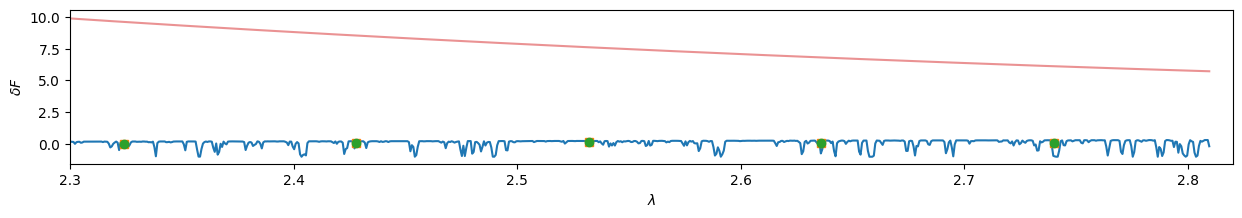

In [7]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred, delta1)
pl.plot(zz, deltaFbin1,'s')
pl.plot(zz, deltaFbin1_old,'o')
pl.plot(objred, weights1,alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

In [23]:
# check object ID for the noisy ones:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"
simroot = root + f"analysis-0/jura-0/uncontaminated/deltas_lya/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hdu = fin[1].header
#hduh
print(fin[2].header)
ID = fin[2].data['LOS_ID']
objind = ID == 870000004
wave2 = fin[1].data
ra = (fin[2].data['RA'])[objind]
dec = (fin[2].data['DEC'])[objind]
zqso2 = fin[2].data['Z'][objind]
delta2 = fin[3].data[objind,:]
weights2 = fin[4].data[objind,:]
objred = (wave2-emit)/emit
print(ra, dec, zqso2)

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/uncontaminated/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   84 / width of table in bytes                        NAXIS2  =                  829 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    9 / number of fields in each row                   TTYPE1  = 'LOS_ID  '           / label for field   1                            TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           TTYPE2  = 'RA      '           / 

In [12]:
deltaFbin2 = weighted_lyaf(wave, delta2[0,:], weights2[0,:], zqso2, zbin_edges, old=False)
deltaFbin2_old = weighted_lyaf(wave, delta2[0,:], weights2[0,:], zqso2, zbin_edges, old=True)

(2.3, 2.82)

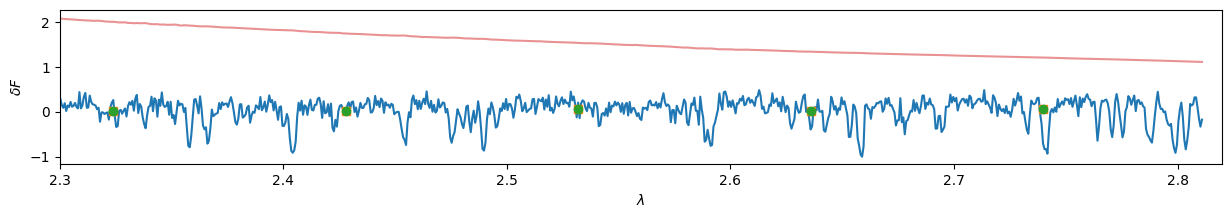

In [13]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred, delta2[0,:])
pl.plot(zz, deltaFbin2,'s')
pl.plot(zz, deltaFbin2_old,'o')
pl.plot(objred, weights2[0,:],alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

Check file below

In [33]:
# check object ID for the noisy ones:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"
simroot = root + f"analysis-0/jura-0/true_cont/deltas_lya/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hdu = fin[1].header
#hduh
print(fin[2].header)
ID = fin[2].data['LOS_ID']
objind = ID == 870000004
print(np.arange(len(ID))[objind])
wave3 = fin[1].data
ra = (fin[2].data['RA'])[objind]
dec = (fin[2].data['DEC'])[objind]
zqso3 = fin[2].data['Z'][objind]
delta3 = fin[3].data[objind,:]
weights3 = fin[4].data[objind,:]
objred3 = (wave3-emit)/emit
print(ra, dec, zqso3)

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/true_cont/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   84 / width of table in bytes                        NAXIS2  =                  811 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    9 / number of fields in each row                   TTYPE1  = 'LOS_ID  '           / label for field   1                            TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           TTYPE2  = 'RA      '           / label

In [15]:
deltaFbin3 = weighted_lyaf(wave3, delta3[0,:], weights3[0,:], zqso3, zbin_edges, old=False)
deltaFbin3_old = weighted_lyaf(wave3, delta3[0,:], weights3[0,:], zqso3, zbin_edges, old=True)

(2.3, 2.82)

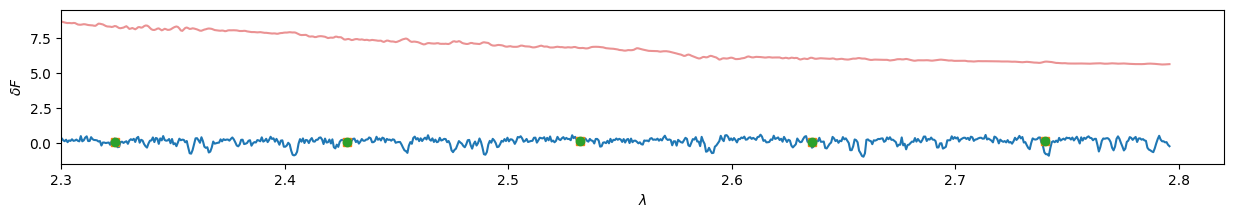

In [16]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred3, delta3[0,:])
pl.plot(zz, deltaFbin3,'s')
pl.plot(zz, deltaFbin3_old,'o')
pl.plot(objred3, weights3[0,:],alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

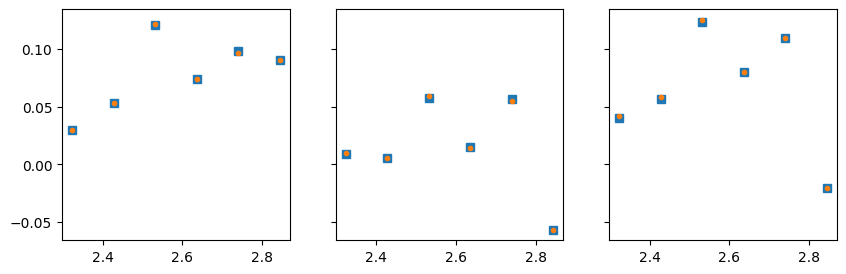

In [17]:
fig,axarr=pl.subplots(1,3,figsize=[10,3],sharey=True)
pl.sca(axarr[0])
pl.plot(zz[3:-1], deltaFbin1[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin1_old[3:-1],'.')

pl.sca(axarr[1])
pl.plot(zz[3:-1], deltaFbin2[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin2_old[3:-1],'.')

pl.sca(axarr[2])
pl.plot(zz[3:-1], deltaFbin3[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin3_old[3:-1],'.')

/global/cfs/cdirs/desi/users/wmturner/photo-z/deltas/mock-0/noSNRcut/Delta/


(2.3, 2.82)

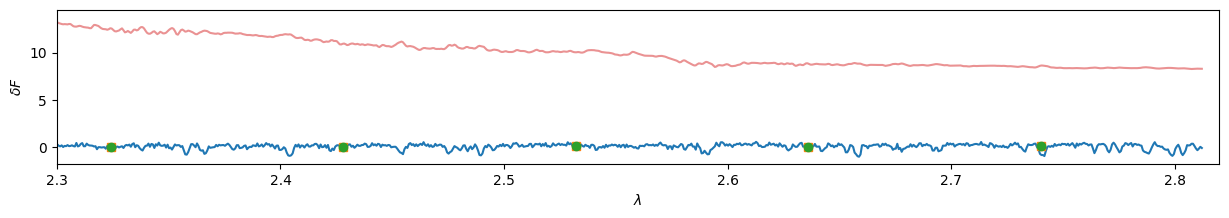

In [57]:
# let's also load the LyCAN mock:

root = "/global/cfs/cdirs/desi/users/wmturner/photo-z/deltas/mock-0/"
simroot = root + "noSNRcut/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits")
hduh = fin[1].header
zqso4 = hduh['Z']

wave4 = fin[1].data['LAMBDA']
delta4 = fin[1].data['DELTA']
weights4 = fin[1].data['WEIGHT']
objred4 = (wave4-emit)/emit

deltaFbin4 = weighted_lyaf(wave4, delta4, weights4, zqso4, zbin_edges, old=False)
deltaFbin4_old = weighted_lyaf(wave4, delta4, weights4, zqso4, zbin_edges, old=True)

# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred4, delta4)
pl.plot(zz, deltaFbin4,'s')
pl.plot(zz, deltaFbin4_old,'o')
pl.plot(objred4, weights4,alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

/global/cfs/cdirs/desi/users/wmturner/photo-z/deltas/mock-0/SNRcut/Delta/
2.84592032432556 2.16740300051663 0.160723070077313


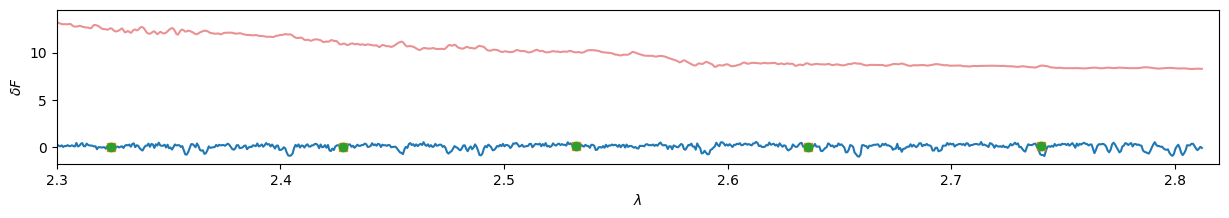

In [64]:
# let's also load the LyCAN mock:

root = "/global/cfs/cdirs/desi/users/wmturner/photo-z/deltas/mock-0/"
simroot = root + "SNRcut/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits")
hduh = fin[1].header
zqso5 = hduh['Z']
ra5 = hduh['RA']
dec5 = hduh['DEC']

wave5 = fin[1].data['LAMBDA']
delta5 = fin[1].data['DELTA']
weights5 = fin[1].data['WEIGHT']
objred5 = (wave4-emit)/emit

deltaFbin5 = weighted_lyaf(wave5, delta5, weights5, zqso5, zbin_edges, old=False)
deltaFbin5_old = weighted_lyaf(wave5, delta5, weights5, zqso5, zbin_edges, old=True)

# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred5, delta5)
pl.plot(zz, deltaFbin5,'s')
pl.plot(zz, deltaFbin5_old,'o')
pl.plot(objred5, weights5,alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

print(zqso5, ra5, dec5)

In [18]:
# compute wavelength limits:
lambda_rf_min=1040
lambda_rf_max=1200
lambda_obs_min=lambda_rf_min*(1+zqso)
lambda_obs_max=lambda_rf_max*(1+zqso)
lambda_obs_additional = 3600

emit = 1215.67
objred = (wave-emit)/emit
print(lambda_obs_min,lambda_obs_max, lambda_obs_additional)

3997.567443847661 4612.577819824224 3600


In [19]:
def lambda_to_z(x):
    emit = 1215.67
    return  (x-emit)/emit

def z_to_lambda(y):
    emit = 1215.67
    return y*emit + emit

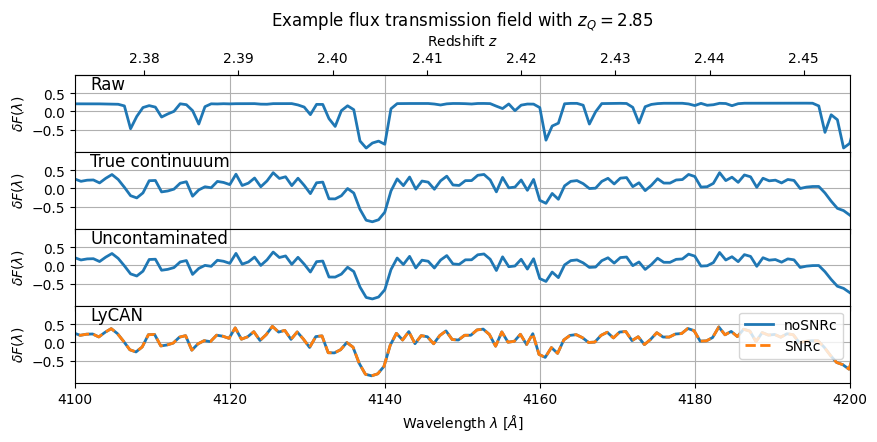

In [62]:
fig,axarr = pl.subplots(4, figsize=[10,4],sharex=True, sharey=True)
for ii in range(4):
    pl.sca(axarr[ii])
    pl.grid()
    pl.ylabel("$\\delta F(\\lambda)$")

pl.sca(axarr[0])
pl.plot(wave, delta1, lw=2)
pl.text(4102, 0.6, "Raw", size=12)
pl.title("Example flux transmission field with $z_Q = 2.85$")
pl.xlim([4100,4200])

secax = axarr[0].secondary_xaxis('top', functions=(lambda_to_z, z_to_lambda))
secax.set_xlabel('Redshift $z$')

pl.sca(axarr[1])
pl.plot(wave3, delta3[0,:], lw=2)
pl.text(4102, 0.6, "True continuuum", size=12)

pl.sca(axarr[2])
pl.plot(wave2, delta2[0,:], lw=2)
pl.xlim([4100,4200])
pl.xlabel("Wavelength $\\lambda$ [$\\AA$]")
pl.text(4102, 0.6, "Uncontaminated", size=12)
pl.ylim([-1.1, 1.0])
pl.yticks([-0.5,0,0.5])

pl.sca(axarr[3])
pl.plot(wave4, delta4, lw=2, label="noSNRc")
pl.plot(wave5, delta5, lw=2, label="SNRc", ls='--')
pl.xlim([4100,4200])
pl.xlabel("Wavelength $\\lambda$ [$\\AA$]")
pl.text(4102, 0.6, "LyCAN", size=12)
pl.ylim([-1.1, 1.0])
pl.yticks([-0.5,0,0.5])
pl.legend()
    
pl.subplots_adjust(hspace=0)
pl.savefig("../plots/delta_f_example.pdf",bbox_inches="tight")

# 2. Delta F on a cut-out

In [131]:
# load delta f catalogue 
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-raw.fits"
fin = fits.open(fname)
#fin[1].header

# select a redshift bin:
zbinfile = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/delta_F/zbins.txt")
nbin = 5
zbinedges = zbinfile[5:7,0]
print(zbinedges)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra = fin[1].data['RA'][ind]
dec = fin[1].data['DEC'][ind]
delta = fin[1].data['DELTA_F'][ind]

ind2 = (ra>150) & (ra<160) & (dec> 5) & (dec<10)

[2.1407783  2.19805536]


In [132]:
# select a redshift bin:
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-baseline.fits"
fin = fits.open(fname)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra2 = fin[1].data['RA'][ind]
dec2 = fin[1].data['DEC'][ind]
delta2 = fin[1].data['DELTA_F'][ind]

ind22 = (ra2>150) & (ra2<160) & (dec2> 5) & (dec2<10)

In [135]:
# select a redshift bin:
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-true_cont.fits"
fin = fits.open(fname)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra3 = fin[1].data['RA'][ind]
dec3 = fin[1].data['DEC'][ind]
delta3 = fin[1].data['DELTA_F'][ind]

ind23 = (ra3>150) & (ra3<160) & (dec3> 5) & (dec3<10)

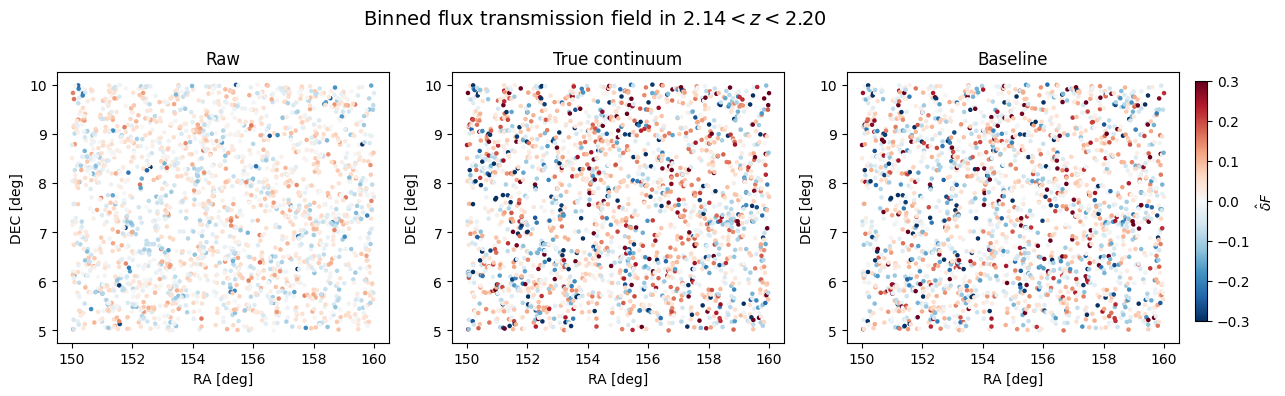

In [165]:
fig,axarr=pl.subplots(1,3,figsize=[12,4])

fig.suptitle("Binned flux transmission field in $2.14<z<2.20$", fontsize=14)

pl.sca(axarr[0])
pl.scatter(ra[ind2], dec[ind2], c=delta[ind2], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("Raw")
#pl.colorbar()

pl.sca(axarr[1])
pl.scatter(ra3[ind23], dec3[ind23], c=delta3[ind23], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("True continuum")
#pl.colorbar()

pl.sca(axarr[2])
im = pl.scatter(ra2[ind22], dec2[ind22], c=delta2[ind22], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("Baseline")

pl.tight_layout()

cb_ax = fig.add_axes([1, 0.2, 0.01, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$\\hat{\\delta} F$')
pl.savefig("../plots/delta_f_catalog_example.pdf",bbox_inches="tight")

# 3. YAW results: mock 0 with different settings
Here we test cases:
- raw (weight = npix)
- true_cont (weight = tot pix weight)
- uncontaminated (weight = tot pix weight)
- LyCAN no SNR cut (weight = tot pix weight)
- LyCAN SNR cut (weight = tot pix weight) * only Mock 0

For each case, we use three sets of angular scales:
- [5,15] arcmin
- [10,30] arcmin
- [15,50] arcmin

We use two binning:
- 40 redshift bins between $2<z<3$, with a bin width of $\Delta z = 0.025$;
- 20 bins between $2<z<3$, with a bin width of  $\Delta z = 0.05$.

The photometric sample has the following setup:
- Full photometric catalog with z>1.8 (ngal > SRD 10 year source)
- Gaussian centred at z=2.0, with cut at z>1.8 (low)
- Gaussian centred at z=2.5, with cut at z>1.8 (mid)
- SRD full sample with ngal = 5.4 / arcmin^2

In [22]:
from yaw.correlation.corrfunc import ScalarCorrFunc

In [23]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"

In [25]:
theta_min=[5,10,15]
theta_max=[15,30,50]
sim_num = 0
saveroot = root + f"run-{sim_num}/"

### phot z>1.8, 40 bins: 

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


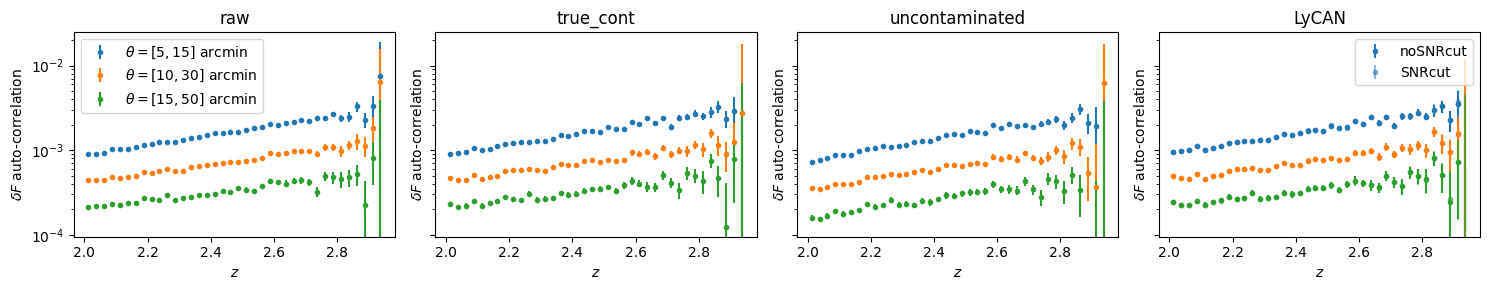

In [46]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_ss.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$ auto-correlation")
        pl.yscale('log')
        if ss == 0:
            pl.legend()
        pl.title(sim_mode_tag)

# plot LyCAN case:
pl.sca(axarr[3])
for ss, sim_mode_tag in enumerate(["LyCAN_noSNRcut","LyCAN_SNRcut"]):
    if ss==0:
        alpha=1
    elif ss==1:
        alpha=0.5
    for ii in range(len(theta_min)):
        if ii == 0:
            label=sim_mode_tag[6:]
        else:
            label=""
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        x = cts_ss.binning.mids
        y = cts_ss.sample().data
        dy = cts_ss.sample().error
        pl.errorbar(x,y,yerr=dy,color=f'C{ii}',alpha=alpha, fmt='.',label=label)
pl.xlabel("$z$")
pl.ylabel("$\\delta F$ auto-correlation")
pl.yscale('log')
pl.title("LyCAN")
pl.legend()

pl.tight_layout()
pl.savefig("lya-auto-mock-0.pdf", bbox_inches="tight")

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


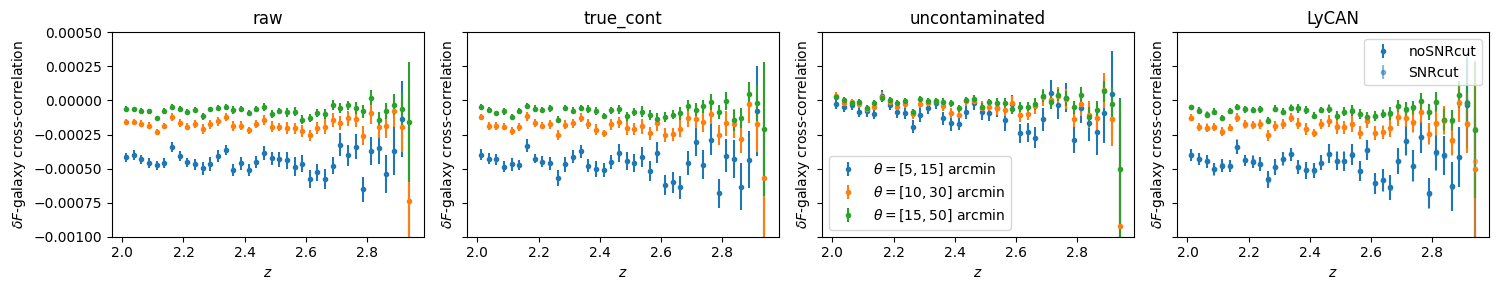

In [47]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_sp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$-galaxy cross-correlation")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)

# plot LyCAN case:
pl.sca(axarr[3])
for ss, sim_mode_tag in enumerate(["LyCAN_noSNRcut","LyCAN_SNRcut"]):
    if ss==0:
        alpha=1
    elif ss==1:
        alpha=0.5
    for ii in range(len(theta_min)):
        if ii == 0:
            label=sim_mode_tag[6:]
        else:
            label=""
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        x = cts_sp.binning.mids
        y = cts_sp.sample().data
        dy = cts_sp.sample().error
        pl.errorbar(x,y,yerr=dy,color=f'C{ii}',alpha=alpha, fmt='.',label=label)
pl.xlabel("$z$")
pl.ylabel("$\\delta F$-galaxy cross-correlation")
pl.title("LyCAN")
pl.legend()
pl.ylim([-0.001,0.0005])

pl.tight_layout()
pl.savefig("lya-cross-mock-0.pdf", bbox_inches="tight")

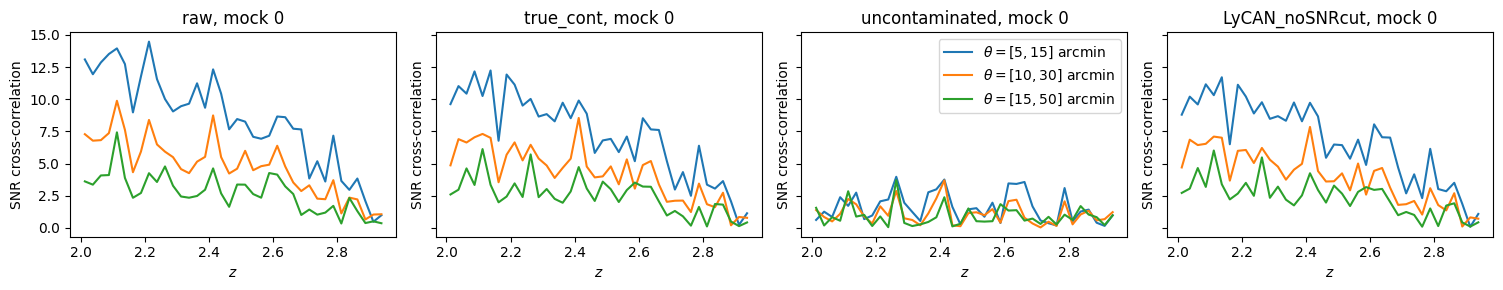

In [147]:
# signal-to-noise:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated","LyCAN_noSNRcut"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        data = abs(cts_sp.sample().data)
        error = cts_sp.sample().error
        zz = cts_sp.binning.mids
        pl.plot(zz, data/error,label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        if ss == 2:
            pl.legend()
        pl.xlabel("$z$")
        pl.ylabel("SNR cross-correlation")
        pl.title(sim_mode_tag + ", mock 0")

pl.tight_layout()

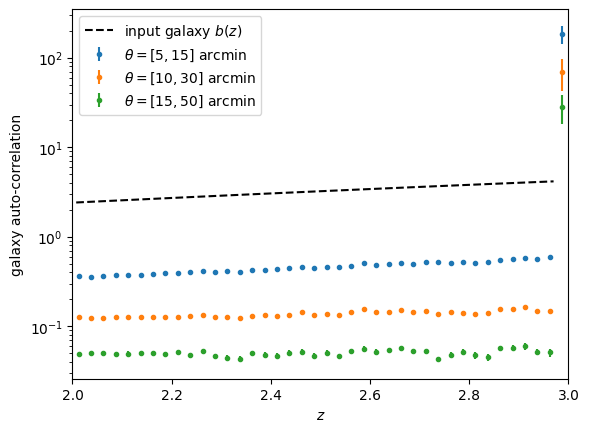

In [48]:
for ii in range(len(theta_min)):
    cts_pp = yaw.CorrFunc.from_file(saveroot + f"yaw/w_pp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
    cts_pp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
    pl.xlabel("$z$")
    pl.ylabel("galaxy auto-correlation")
pl.yscale('log')

# load and plot bias evolution curve:
bz = np.loadtxt("../bias_dc2.txt")
pl.plot(bz[:,0],bz[:,1],'--', label="input galaxy $b(z)$",color='k')
pl.xlim([2,3])
pl.legend()
pl.savefig("galaxy-auto-mock-0.pdf", bbox_inches="tight")

In [124]:
# here plot against true n(z):
root = "/pscratch/sd/q/qhang/desi-lya/results/"
#edges = cts_pp.binning.edges
#dz = edges[1]-edges[0]
nz_mean = 0
for ii in range(Nsims):
    if ii%3 == 0:
        print(f"Working on sim {ii}")
    fin = fits.open(root + f"run-{ii}/catalogue/unknown-zmin-1.8-zmax-3.0.fits")
    cc, nz_edges = np.histogram(fin[1].data['Z'], bins=np.linspace(1.7,3.0,53))
    nz_mean += cc
# here normalize
dz = nz_edges[1]-nz_edges[0]
nz_norm = nz_mean/sum(nz_mean)/dz
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-z1.8-3.0-all-boxes-40bin.txt"
np.savetxt(fname, np.c_[nz_edges, np.append(nz_norm, 0)])

Working on sim 0
Working on sim 3
Working on sim 6
Working on sim 9


In [142]:
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-z1.8-3.0-all-boxes-40bin.txt"
fin = np.loadtxt(fname)
nz_norm = fin[:-1,1]
nz_edges = fin[:,0]

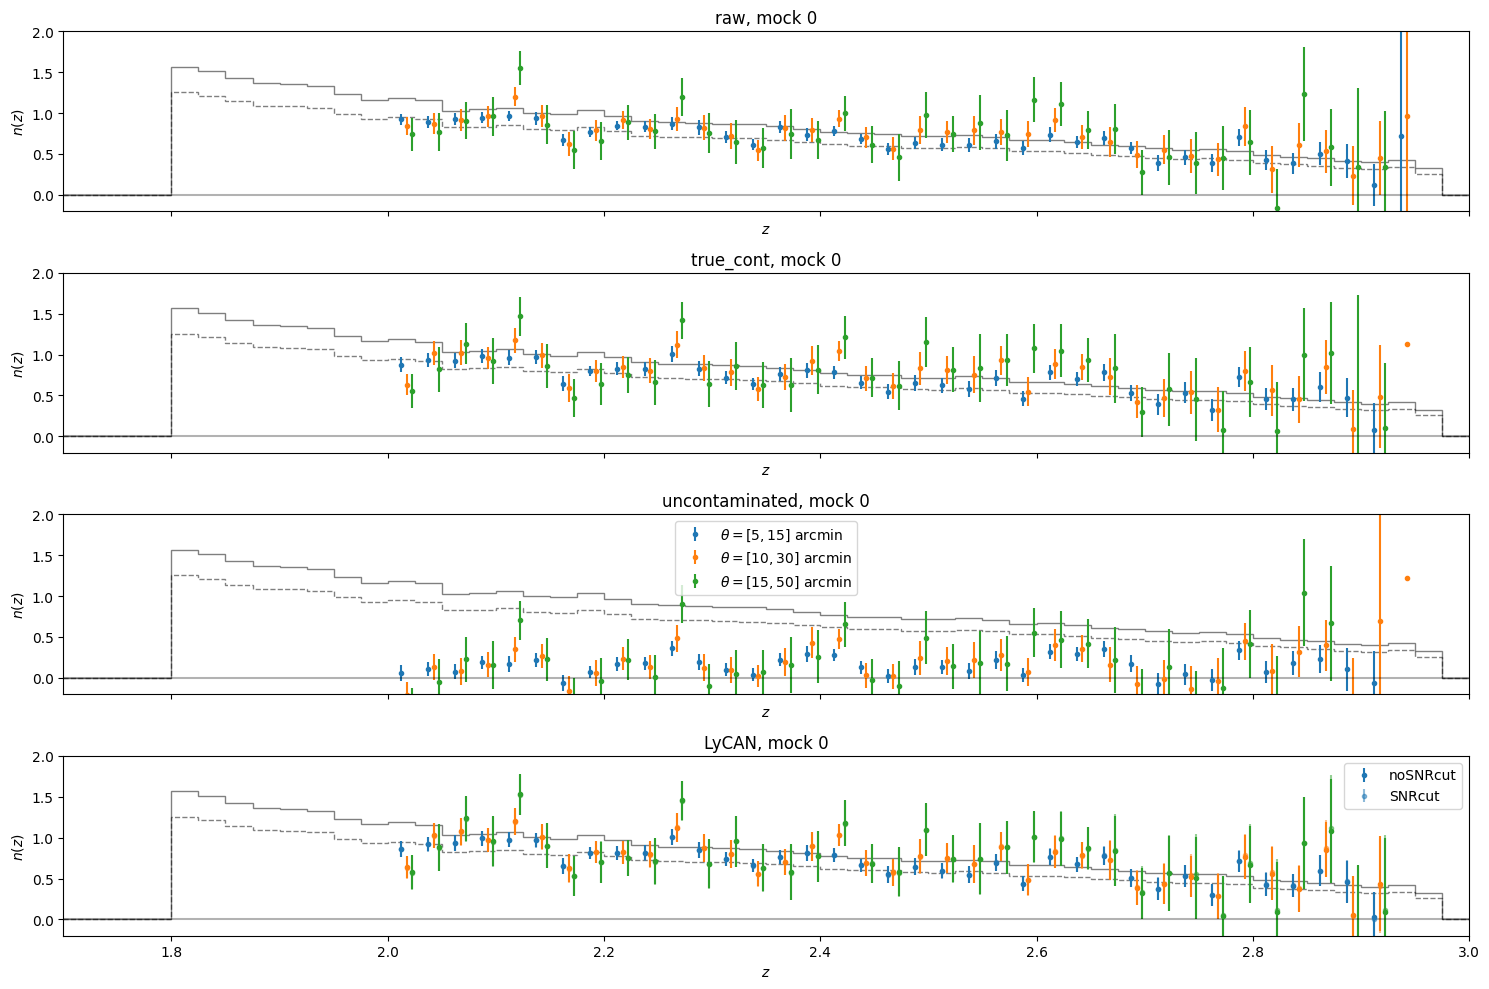

In [144]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(4,figsize=[15,10],sharey=True,sharex=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag + ", mock 0")
    
    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.8,nz_edges, color='k', alpha=0.5, ls='--')
    pl.plot([1.7,3],[0,0],'k-', alpha=0.3)

# plot LyCAN case:
pl.sca(axarr[3])
for ss, sim_mode_tag in enumerate(["LyCAN_noSNRcut","LyCAN_SNRcut"]):
    if ss==0:
        alpha=1
    elif ss==1:
        alpha=0.5
    for ii in range(len(theta_min)):
        if ii == 0:
            label=sim_mode_tag[6:]
        else:
            label=""
        ncc = np.loadtxt(saveroot + f"yaw/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=label, alpha=alpha,
                   fmt='.', color=f'C{ii}')
pl.stairs(nz_norm,nz_edges, color='k', alpha=0.5)
pl.stairs(nz_norm*0.8,nz_edges, color='k', alpha=0.5, ls='--')
pl.plot([1.7,3],[0,0],'k-', alpha=0.3)
pl.xlabel("$z$")
pl.ylabel("$n(z)$")
pl.legend()
pl.title("LyCAN" + ", mock 0")

pl.ylim([-0.2,2])
pl.xlim([1.7,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

### phot z>1.8, 20 bins: 

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


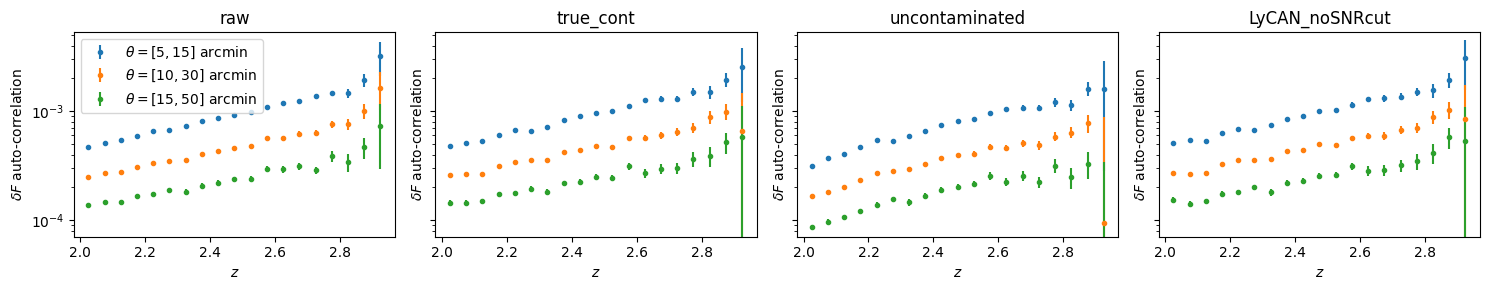

In [26]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated","LyCAN_noSNRcut"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_ss.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$ auto-correlation")
        pl.yscale('log')
        if ss == 0:
            pl.legend()
        pl.title(sim_mode_tag)

pl.tight_layout()
#pl.savefig("lya-auto-mock-0.pdf", bbox_inches="tight")

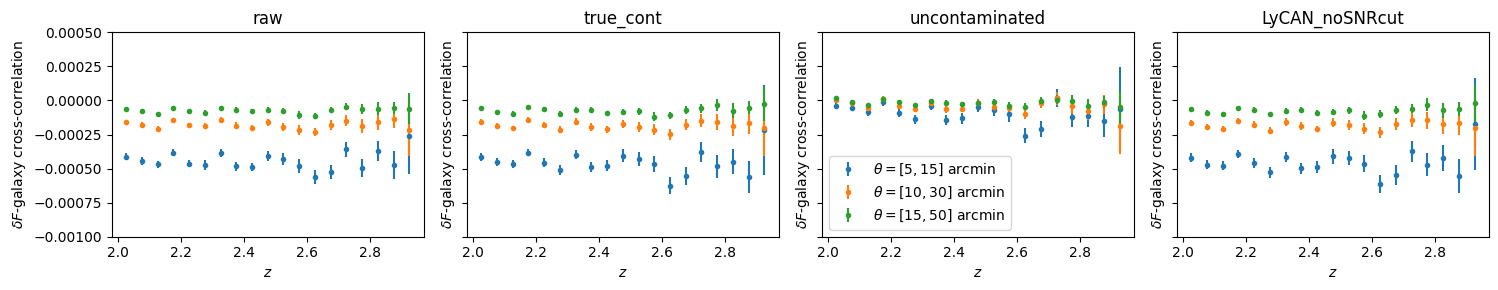

In [27]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated","LyCAN_noSNRcut"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_sp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$-galaxy cross-correlation")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)

pl.ylim([-0.001,0.0005])

pl.tight_layout()
#pl.savefig("lya-cross-mock-0.pdf", bbox_inches="tight")

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


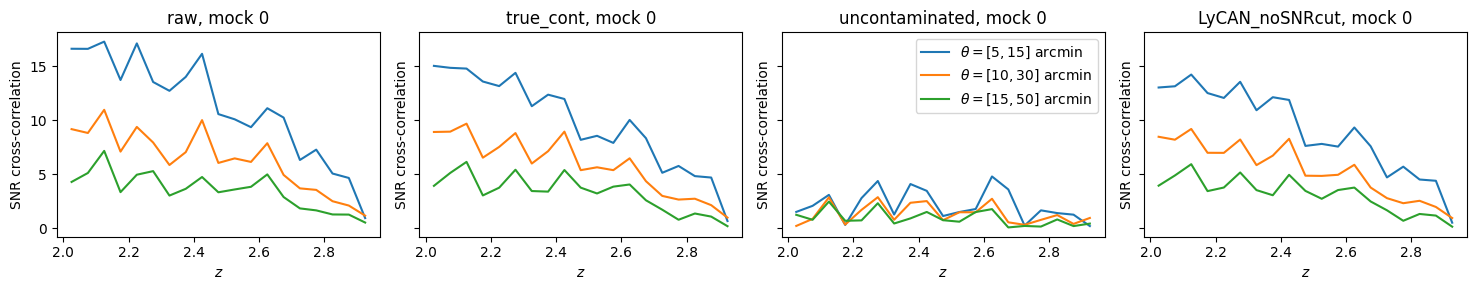

In [145]:
# plot SNR:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated","LyCAN_noSNRcut"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        data = abs(cts_sp.sample().data)
        error = cts_sp.sample().error
        zz = cts_sp.binning.mids
        pl.plot(zz, data/error,label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        if ss == 2:
            pl.legend()
        pl.xlabel("$z$")
        pl.ylabel("SNR cross-correlation")
        pl.title(sim_mode_tag + ", mock 0")

pl.tight_layout()

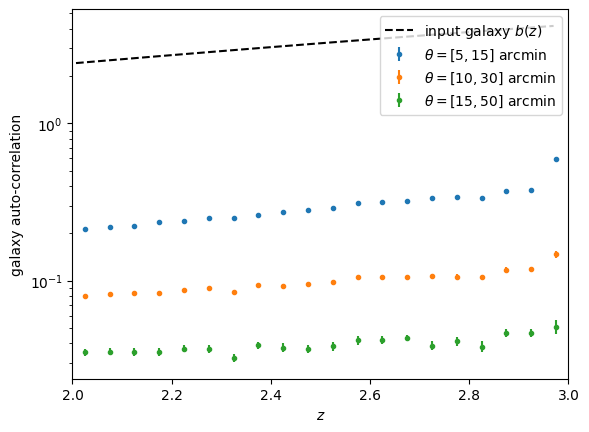

In [34]:
for ii in range(len(theta_min)):
    cts_pp = yaw.CorrFunc.from_file(saveroot + f"yaw-20bin/w_pp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
    cts_pp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
    pl.xlabel("$z$")
    pl.ylabel("galaxy auto-correlation")
pl.yscale('log')

# load and plot bias evolution curve:
bz = np.loadtxt("../bias_dc2.txt")
pl.plot(bz[:,0],bz[:,1],'--', label="input galaxy $b(z)$",color='k')
pl.xlim([2,3])
pl.legend()
#pl.savefig("galaxy-auto-mock-0.pdf", bbox_inches="tight")

In [125]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
#edges = cts_pp.binning.edges
#dz = edges[1]-edges[0]
nz_mean = 0
for ii in range(Nsims):
    if ii%3 == 0:
        print(f"Working on sim {ii}")
    fin = fits.open(root + f"run-{ii}/catalogue/unknown-zmin-1.8-zmax-3.0.fits")
    cc, nz_edges = np.histogram(fin[1].data['Z'], bins=np.linspace(1.7,3.0,27))
    nz_mean += cc
# here normalize
dz = nz_edges[1]-nz_edges[0]
nz_norm = nz_mean/sum(nz_mean)/dz
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-z1.8-3.0-all-boxes-20bin.txt"
np.savetxt(fname, np.c_[nz_edges, np.append(nz_norm, 0)])

Working on sim 0
Working on sim 3
Working on sim 6
Working on sim 9


In [148]:
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-z1.8-3.0-all-boxes-20bin.txt"
fin = np.loadtxt(fname)
nz_norm = fin[:-1,1]
nz_edges = fin[:,0]

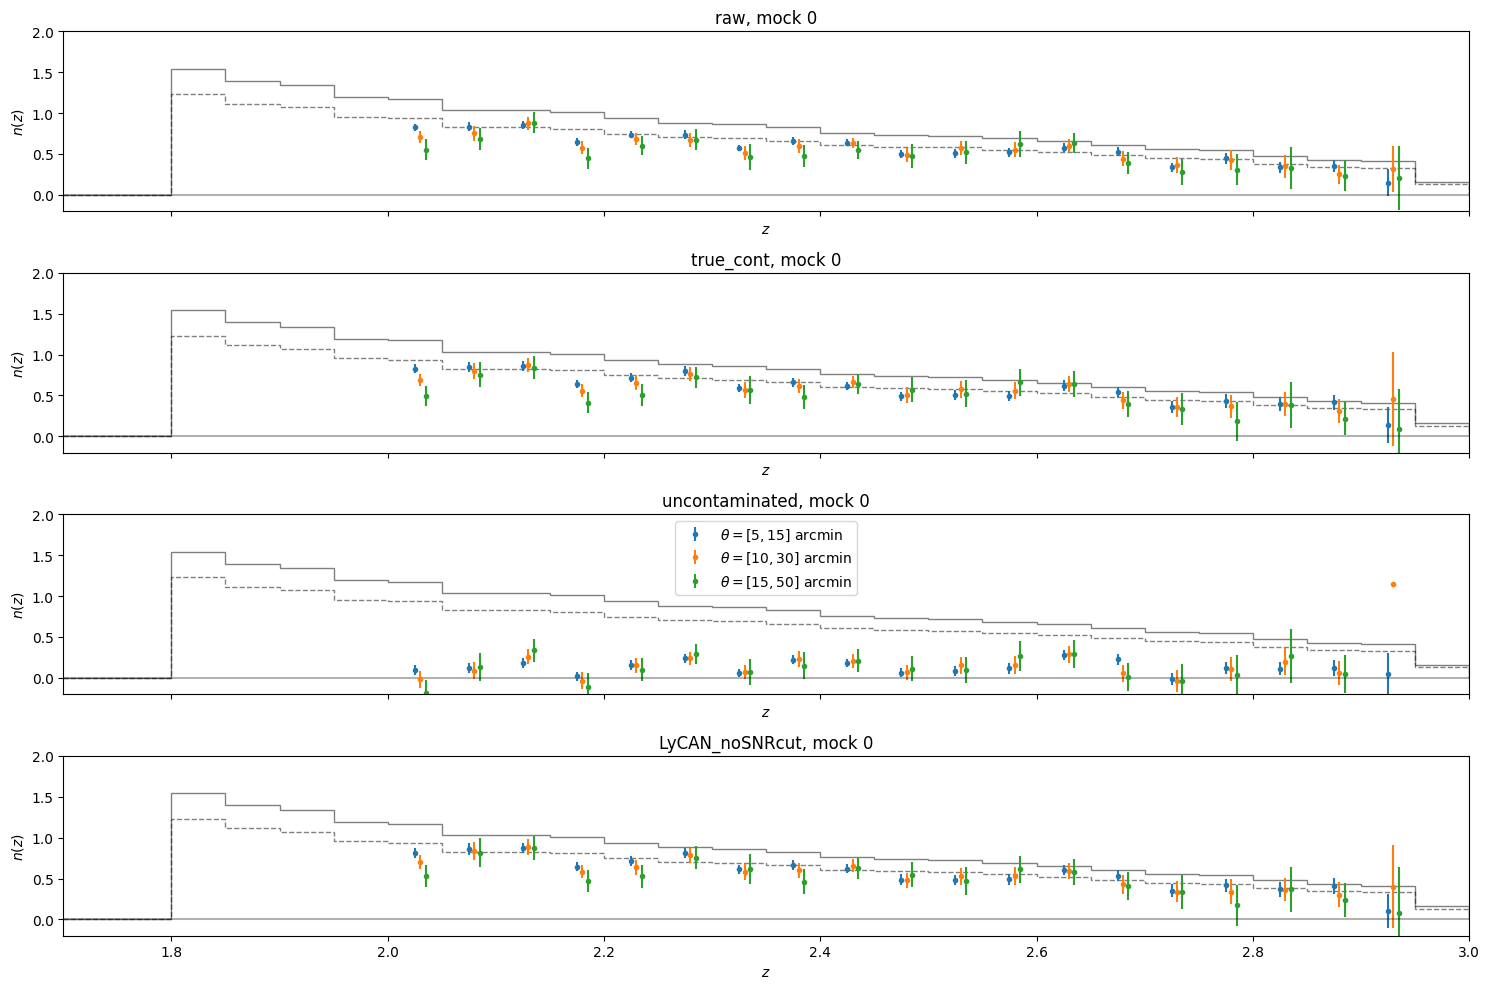

In [149]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(4,figsize=[15,10],sharey=True,sharex=True)

for ss, sim_mode_tag in enumerate(["raw","true_cont","uncontaminated","LyCAN_noSNRcut"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw-20bin/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag + ", mock 0")
    
    pl.stairs(nz_norm, nz_edges, color='k', alpha=0.5, )
    pl.stairs(nz_norm*0.8, nz_edges, color='k', alpha=0.5,ls='--')
    pl.plot([1.7,3.0],[0,0],color='k', alpha=0.3)
pl.ylim([-0.2,2])
pl.xlim([1.7,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

There is an amplitude mis-match of a factor of ~ 0.7. Need to find why this is the case.

### phot z>1.8, mid, 20 bins: 

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


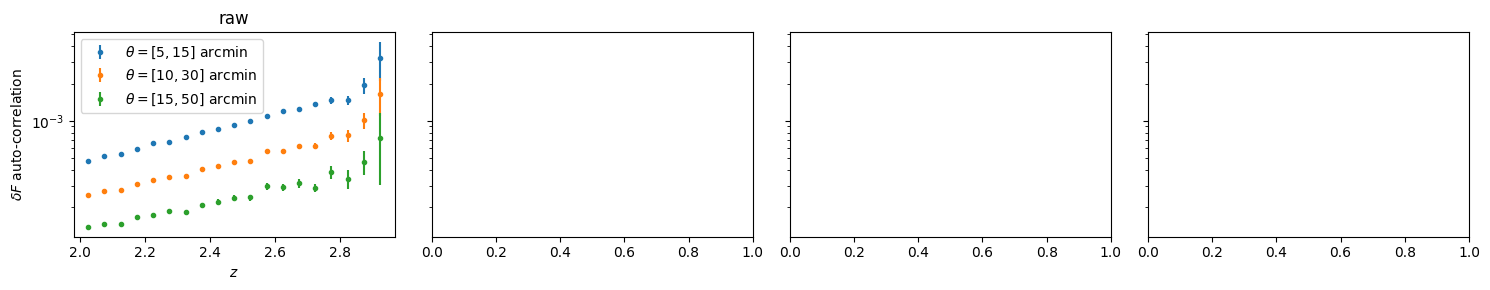

In [74]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-mid/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_ss.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$ auto-correlation")
        pl.yscale('log')
        if ss == 0:
            pl.legend()
        pl.title(sim_mode_tag)

pl.tight_layout()
#pl.savefig("lya-auto-mock-0.pdf", bbox_inches="tight")

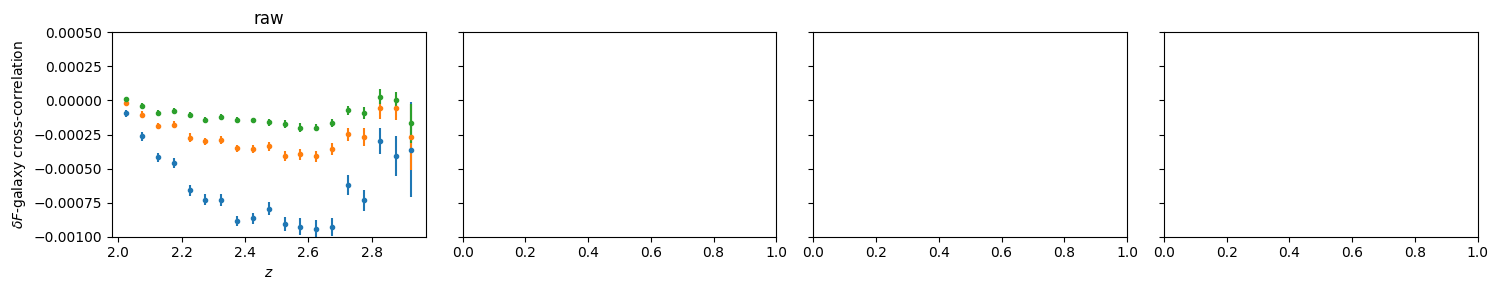

In [75]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-mid/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_sp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$-galaxy cross-correlation")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)

pl.ylim([-0.001,0.0005])

pl.tight_layout()
#pl.savefig("lya-cross-mock-0.pdf", bbox_inches="tight")

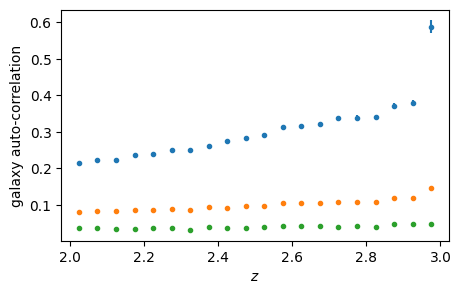

In [77]:
pl.figure(figsize=[5,3])
for ii in range(len(theta_min)):
    cts_pp = yaw.CorrFunc.from_file(saveroot + f"yaw-20bin-mid/w_pp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
    cts_pp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
    pl.xlabel("$z$")
    pl.ylabel("galaxy auto-correlation")
#pl.yscale('log')

In [127]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
#edges = cts_pp.binning.edges
#dz = edges[1]-edges[0]
nz_mean = 0
for ii in range(1):
    if ii%3 == 0:
        print(f"Working on sim {ii}")
    fin = fits.open(root + f"run-{ii}/catalogue/unknown-mid-zmin-1.8-zmax-3.0.fits")
    cc, nz_edges = np.histogram(fin[1].data['Z'], bins=np.linspace(1.7,3.0,27))
    nz_mean += cc
# here normalize
dz = nz_edges[1]-nz_edges[0]
nz_norm = nz_mean/sum(nz_mean)/dz
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-mid-z1.8-3.0-box-0-20bin.txt"
np.savetxt(fname, np.c_[nz_edges, np.append(nz_norm, 0)])

Working on sim 0


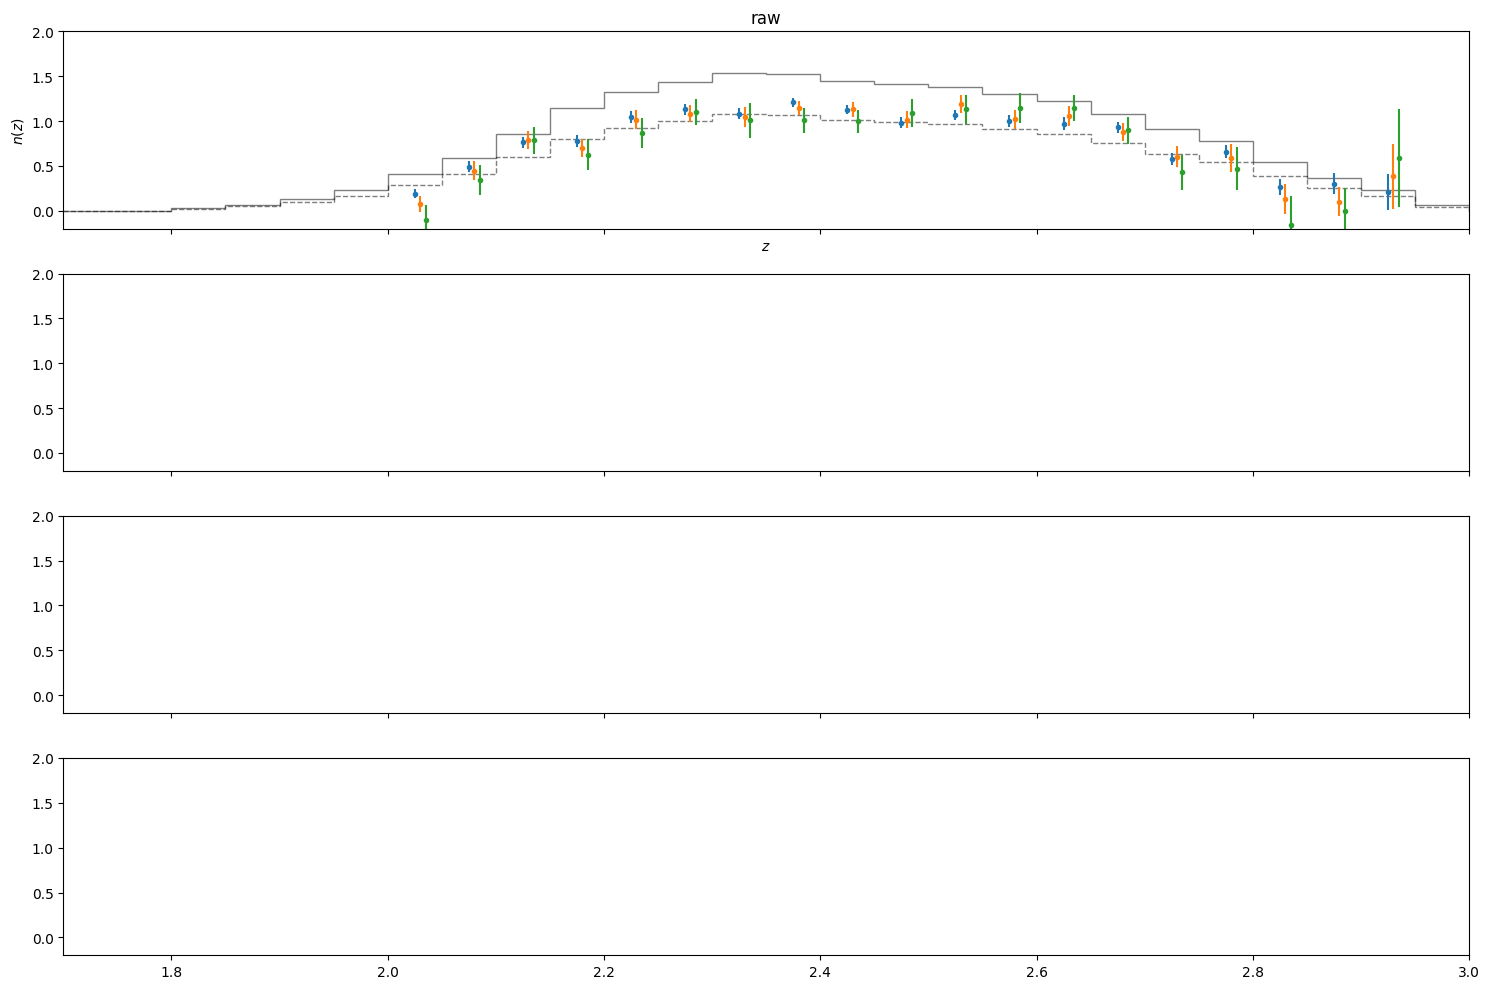

In [87]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(4,figsize=[15,10],sharey=True,sharex=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw-20bin-mid/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)
    
    pl.stairs(nz_norm, nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.7, nz_edges, color='k', alpha=0.5, ls='--')
pl.ylim([-0.2,2])
pl.xlim([1.7,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

### phot z>1.8, low, 20 bins: 

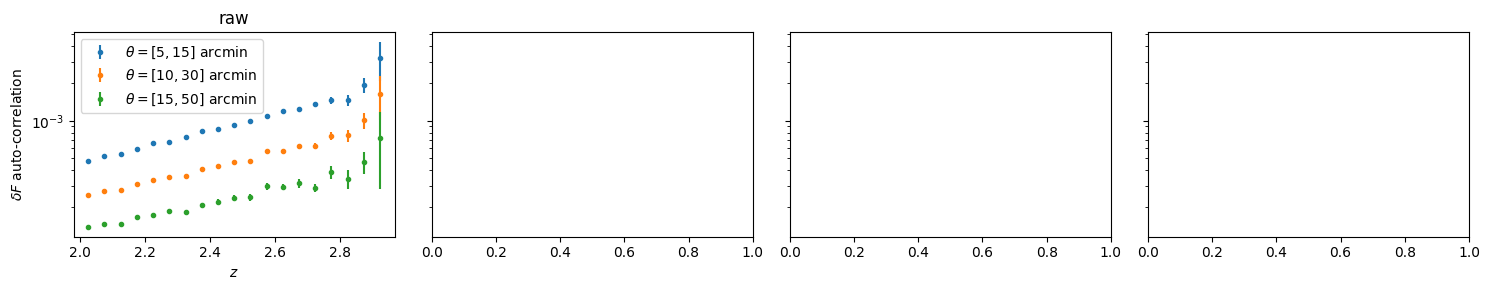

In [88]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-low/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_ss.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$ auto-correlation")
        pl.yscale('log')
        if ss == 0:
            pl.legend()
        pl.title(sim_mode_tag)

pl.tight_layout()
#pl.savefig("lya-auto-mock-0.pdf", bbox_inches="tight")

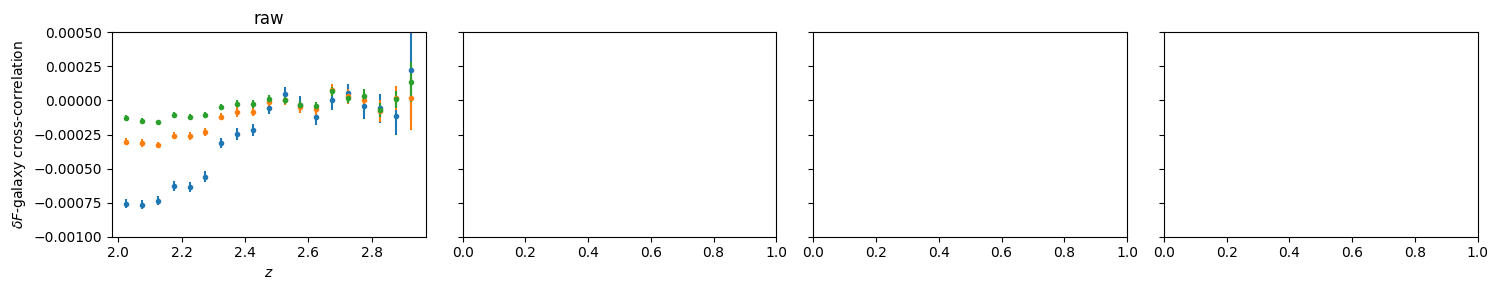

In [89]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-low/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_sp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$-galaxy cross-correlation")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)

pl.ylim([-0.001,0.0005])

pl.tight_layout()
#pl.savefig("lya-cross-mock-0.pdf", bbox_inches="tight")

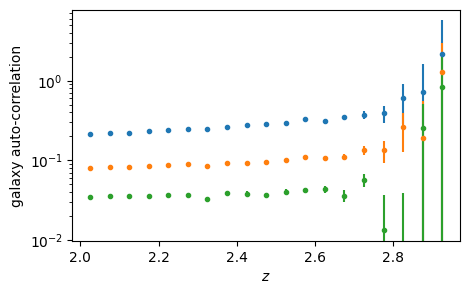

In [91]:
pl.figure(figsize=[5,3])
for ii in range(len(theta_min)):
    cts_pp = yaw.CorrFunc.from_file(saveroot + f"yaw-20bin-low/w_pp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
    cts_pp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
    pl.xlabel("$z$")
    pl.ylabel("galaxy auto-correlation")
pl.yscale('log')

In [128]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
#edges = cts_pp.binning.edges
#dz = edges[1]-edges[0]
nz_mean = 0
for ii in range(1):
    if ii%3 == 0:
        print(f"Working on sim {ii}")
    fin = fits.open(root + f"run-{ii}/catalogue/unknown-low-zmin-1.8-zmax-3.0.fits")
    cc, nz_edges = np.histogram(fin[1].data['Z'], bins=np.linspace(1.7,3.0,27))
    nz_mean += cc
# here normalize
dz = nz_edges[1]-nz_edges[0]
nz_norm = nz_mean/sum(nz_mean)/dz
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-low-z1.8-3.0-box-0-20bin.txt"
np.savetxt(fname, np.c_[nz_edges, np.append(nz_norm, 0)])

Working on sim 0


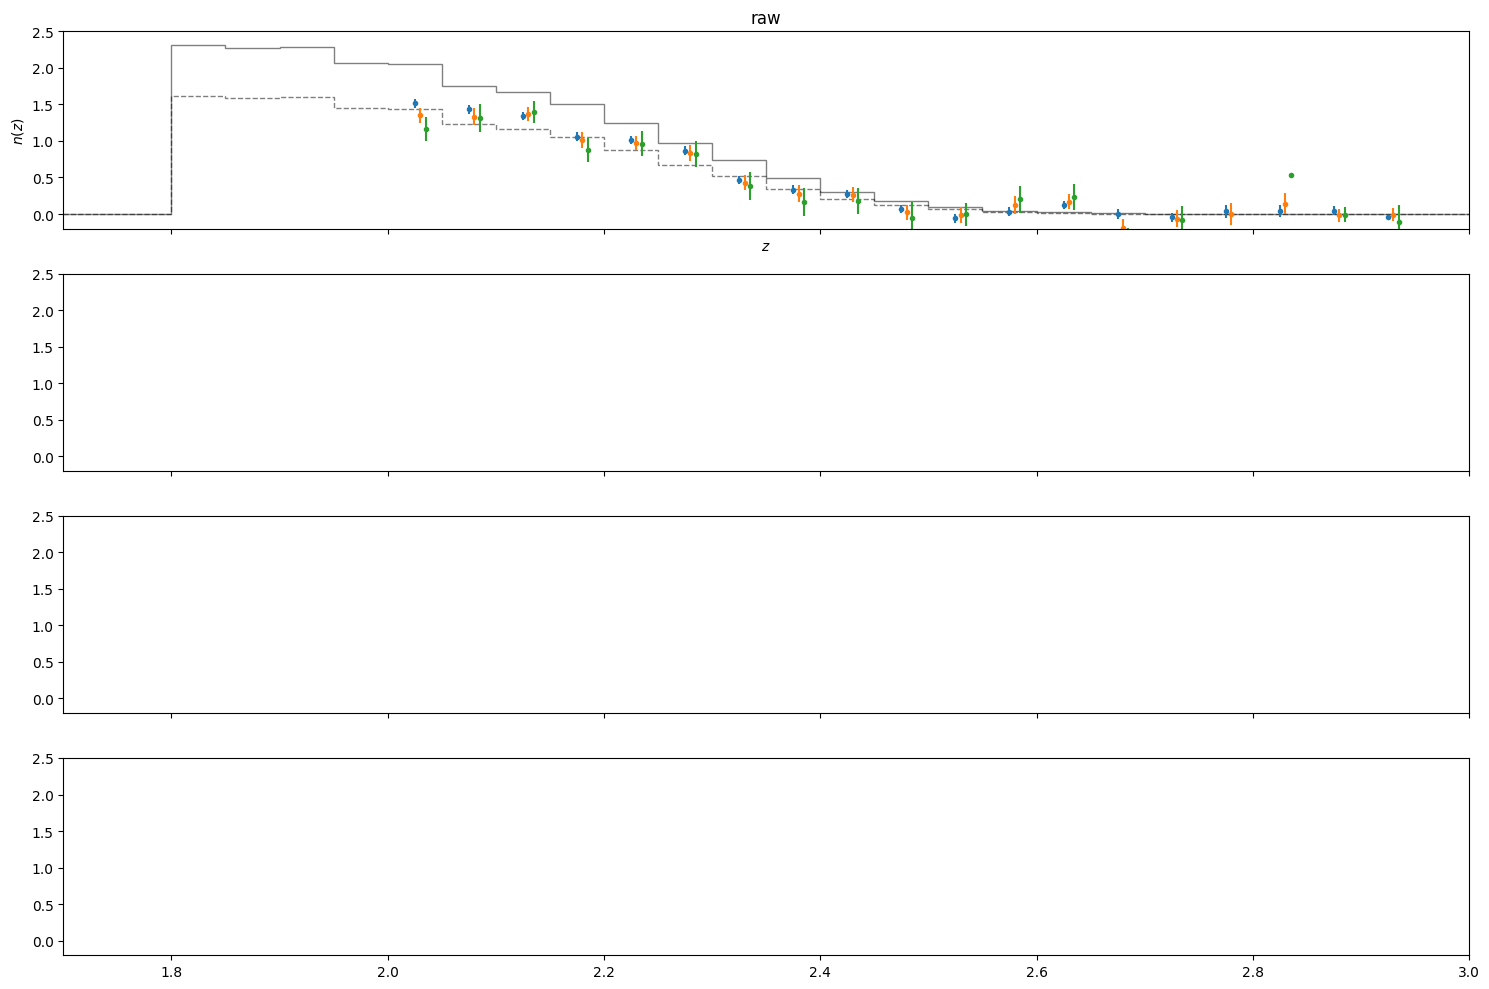

In [95]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(4,figsize=[15,10],sharey=True,sharex=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw-20bin-low/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)
    
    pl.stairs(nz_norm, nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.7, nz_edges, color='k', alpha=0.5, ls='--')
pl.ylim([-0.2,2.5])
pl.xlim([1.7,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

### phot SRD, 20 bins: 

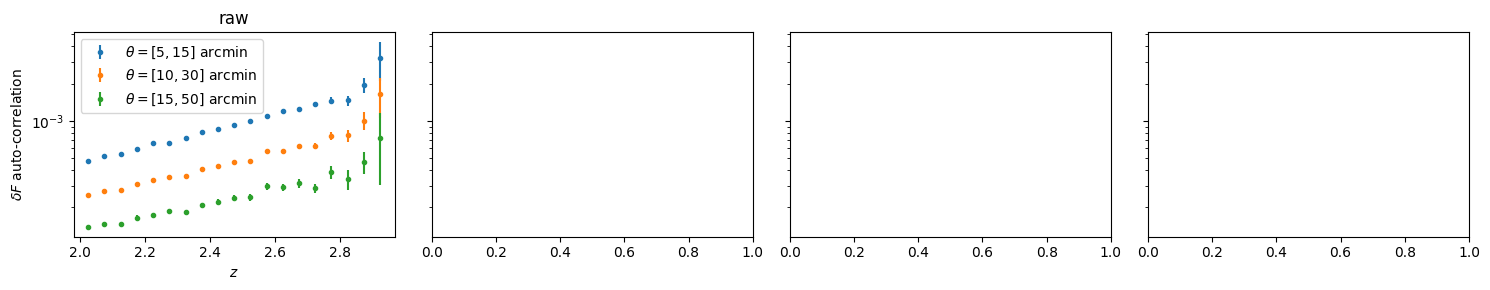

In [96]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_ss = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-SRD_nz/w_ss-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_ss.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$ auto-correlation")
        pl.yscale('log')
        if ss == 0:
            pl.legend()
        pl.title(sim_mode_tag)

pl.tight_layout()
#pl.savefig("lya-auto-mock-0.pdf", bbox_inches="tight")

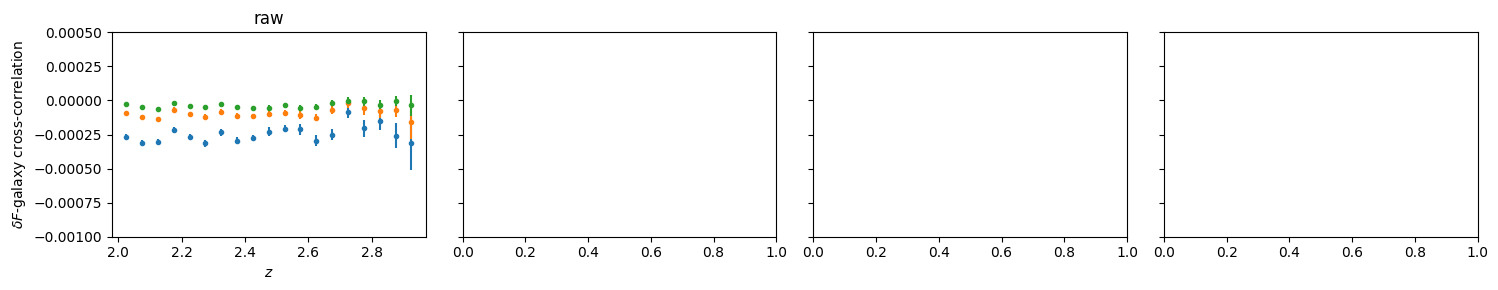

In [100]:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-SRD_nz/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        cts_sp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        pl.xlabel("$z$")
        pl.ylabel("$\\delta F$-galaxy cross-correlation")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)

pl.ylim([-0.001,0.0005])

pl.tight_layout()
#pl.savefig("lya-cross-mock-0.pdf", bbox_inches="tight")

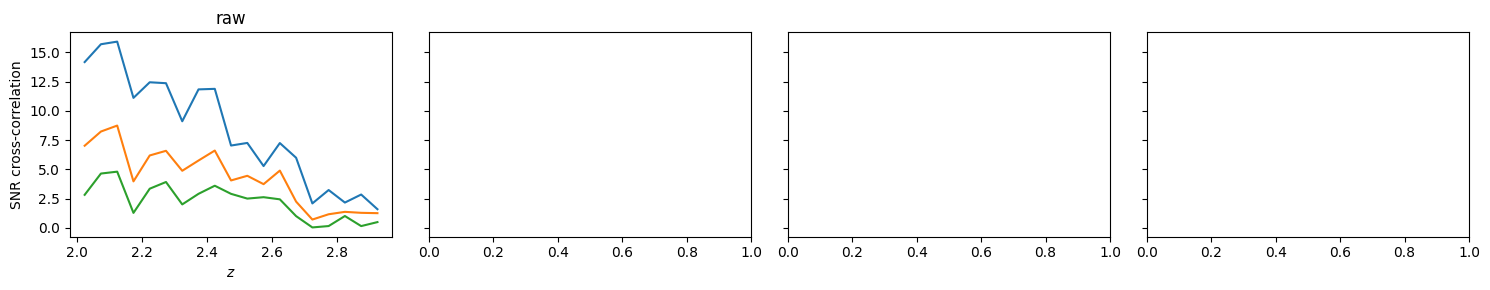

In [101]:
# plot SNR:
fig,axarr=pl.subplots(1,4,figsize=[15,3],sharey=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        cts_sp = ScalarCorrFunc.from_file(saveroot + f"yaw-20bin-SRD_nz/w_sp-{sim_mode_tag}-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
        data = abs(cts_sp.sample().data)
        error = cts_sp.sample().error
        zz = cts_sp.binning.mids
        pl.plot(zz, data/error,label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
        if ss == 2:
            pl.legend()
        pl.xlabel("$z$")
        pl.ylabel("SNR cross-correlation")
        pl.title(sim_mode_tag)

#pl.ylim([-0.001,0.0005])
pl.tight_layout()

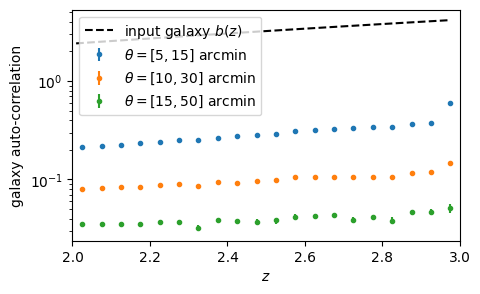

In [102]:
pl.figure(figsize=[5,3])
for ii in range(len(theta_min)):
    cts_pp = yaw.CorrFunc.from_file(saveroot + f"yaw-20bin/w_pp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.hdf5")
    cts_pp.sample().plot(label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin")
    pl.xlabel("$z$")
    pl.ylabel("galaxy auto-correlation")
pl.yscale('log')

# load and plot bias evolution curve:
bz = np.loadtxt("../bias_dc2.txt")
pl.plot(bz[:,0],bz[:,1],'--', label="input galaxy $b(z)$",color='k')
pl.xlim([2,3])
pl.legend()
#pl.savefig("galaxy-auto-mock-0.pdf", bbox_inches="tight")

In [129]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
#edges = cts_pp.binning.edges
#dz = edges[1]-edges[0]
nz_mean = 0
for ii in range(1):
    if ii%3 == 0:
        print(f"Working on sim {ii}")
    fin = fits.open(root + f"run-{ii}/catalogue/unknown-SRD_nz-zmin-0-zmax-3.fits")
    cc, nz_edges = np.histogram(fin[1].data['Z'], bins=np.linspace(0,3.0,61))
    nz_mean += cc
# here normalize
dz = nz_edges[1]-nz_edges[0]
nz_norm = nz_mean/sum(nz_mean)/dz
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-SRD_nz-z0-3-box-0-20bin.txt"
np.savetxt(fname, np.c_[nz_edges, np.append(nz_norm, 0)])

Working on sim 0


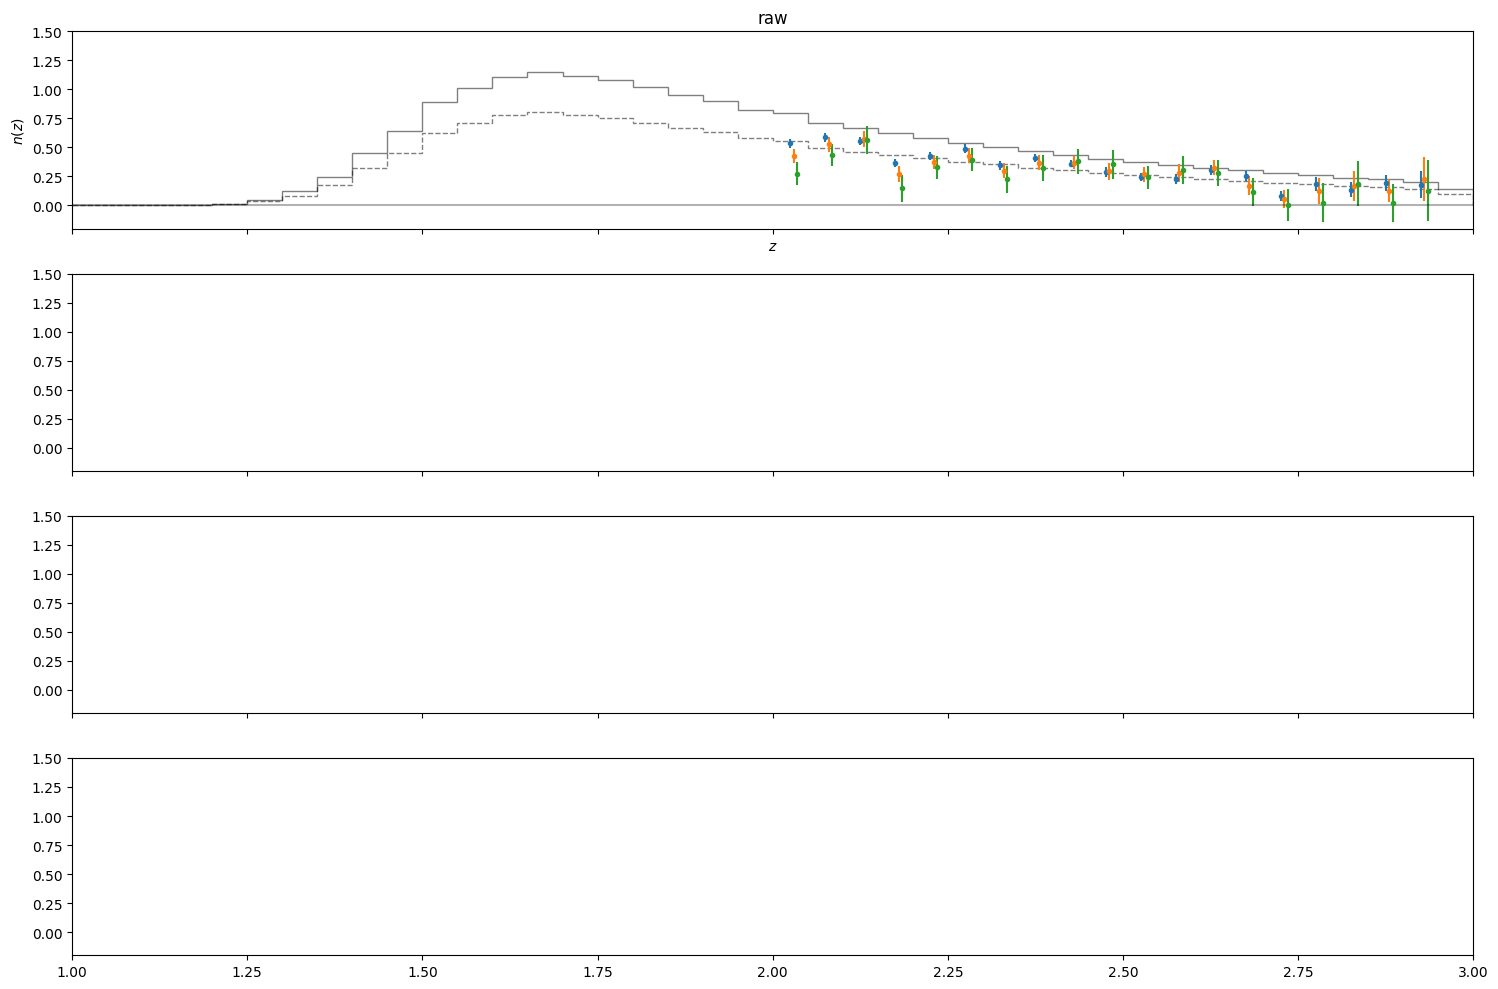

In [109]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(4,figsize=[15,10],sharey=True,sharex=True)

for ss, sim_mode_tag in enumerate(["raw"]):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw-20bin-SRD_nz/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag)
    
    pl.stairs(nz_norm, nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.7, nz_edges, color='k', alpha=0.5, ls='--')
    pl.plot([0,3],[0,0],color='k',alpha=0.3)

pl.ylim([-0.2,1.5])
pl.xlim([1.0,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

### Produce a plot with different phot distribution for mock 0 raw 

In [130]:
nztrue_low = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/nz-gal-true-low-z1.8-3.0-box-0-20bin.txt")
nztrue_mid = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/nz-gal-true-mid-z1.8-3.0-box-0-20bin.txt")
nztrue_SRD = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/nz-gal-true-SRD_nz-z0-3-box-0-20bin.txt")

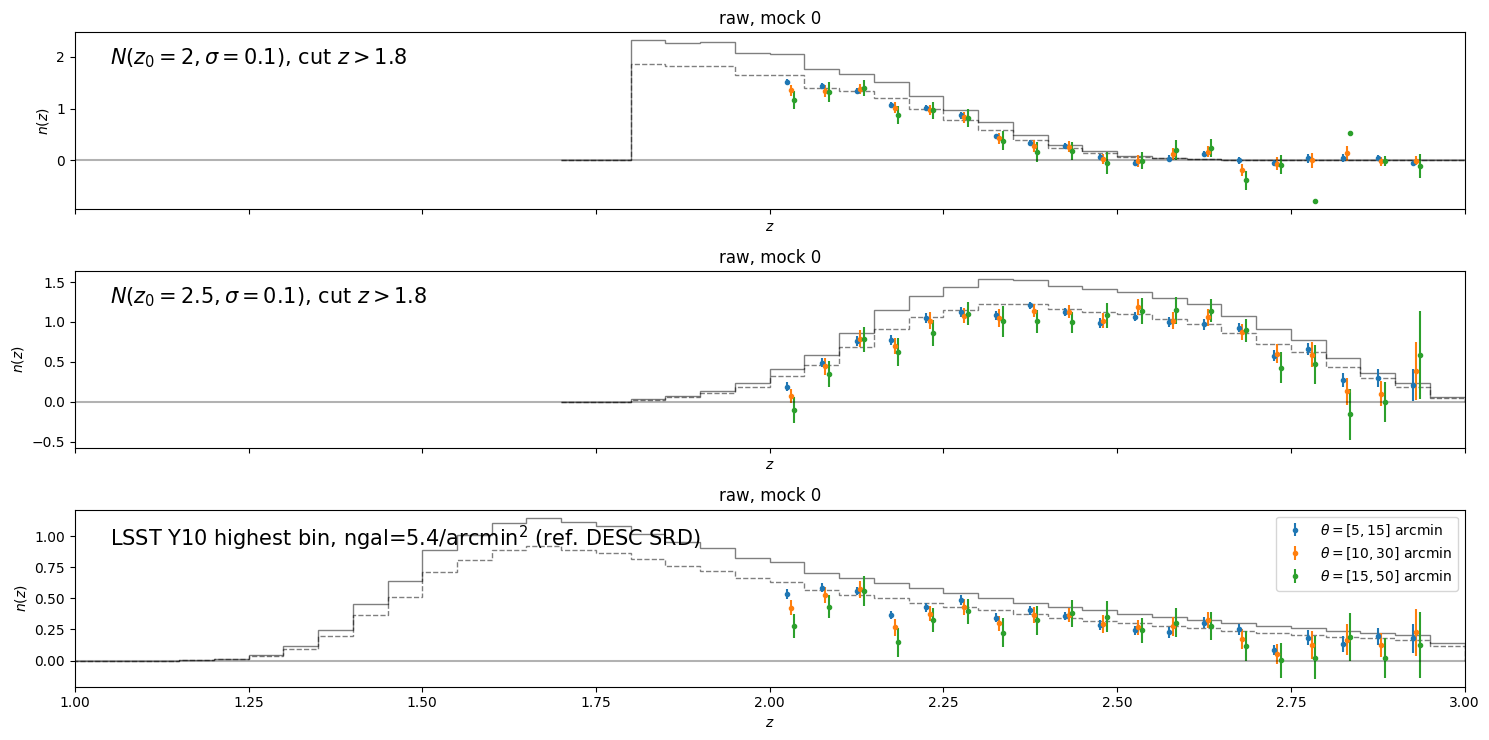

In [141]:
# here plot the recovered redshifts including w_pp:
fig,axarr=pl.subplots(3,figsize=[15,7.5], sharex=True)

sim_mode_tag="raw"
phot_tag=["low","mid","SRD_nz"]
nztrue = [nztrue_low,nztrue_mid,nztrue_SRD]
text=[
    "$N(z_0=2, \\sigma=0.1)$, cut $z>1.8$",
    "$N(z_0=2.5, \\sigma=0.1)$, cut $z>1.8$",
    "LSST Y10 highest bin, ngal=5.4/arcmin$^2$ (ref. DESC SRD)",
]

for ss, pt in enumerate(phot_tag):
    pl.sca(axarr[ss])
    for ii in range(len(theta_min)):
        ncc = np.loadtxt(saveroot + f"yaw-20bin-{pt}/nz_estimate-{sim_mode_tag}-wpp-theta-min-{theta_min[ii]}-max-{theta_max[ii]}.dat")
        pl.errorbar(ncc[:,0] + ii*0.005, ncc[:,1], yerr=ncc[:,2], label=f"$\\theta = [{theta_min[ii]}, {theta_max[ii]}]$ arcmin",
                   fmt='.')
        pl.xlabel("$z$")
        pl.ylabel("$n(z)$")
        if ss == 2:
            pl.legend()
        pl.title(sim_mode_tag + ", mock 0")
    
    nz_norm = nztrue[ss][:-1,1]
    nz_edges = nztrue[ss][:,0]
    pl.stairs(nz_norm, nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.8, nz_edges, color='k', alpha=0.5, ls='--')
    pl.plot([0,3],[0,0],color='k',alpha=0.3)
    pl.text(1.05, nz_norm.max()*0.8, text[ss], size=15)

#pl.ylim([-0.2,1.5])
pl.xlim([1.0,3.0])
pl.tight_layout()
#pl.savefig("nz-wsp-wss-wpp-mock-0.pdf", bbox_inches="tight")

# 4. YAW results: all sims

All 10 boxes

In [151]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"

In [152]:
Nbins=40
Nsims=10
theta_min=[5,10,15]
theta_max=[15,30,50]

In [153]:
w_ss = {}
w_sp = {}
w_pp = {}
ncc = {}
w_ss_jn = {}
w_sp_jn = {}
w_pp_jn = {}
ncc_jn = {}

# different scales:
for mode in ['raw','true_cont','uncontaminated','LyCAN_noSNRcut']:
    # mean value
    w_ss[mode]={}
    w_sp[mode]={}
    ncc[mode]={}

    # jn value
    w_ss_jn[mode]={}
    w_sp_jn[mode]={}
    ncc_jn[mode]={}
    for jj, tmin, tmax in zip(np.arange(len(theta_min)),theta_min,theta_max):
        
        w_ss[mode][jj] = np.zeros((Nbins,Nsims))
        w_sp[mode][jj] = np.zeros((Nbins,Nsims))
        ncc[mode][jj] = np.zeros((Nbins,Nsims))
    
        w_ss_jn[mode][jj]  = np.zeros((Nbins,Nsims))
        w_sp_jn[mode][jj]  = np.zeros((Nbins,Nsims))
        ncc_jn[mode][jj]  = np.zeros((Nbins,Nsims))

        if mode == 'raw':
            w_pp[jj] = np.zeros((Nbins,Nsims))
            w_pp_jn[jj] = np.zeros((Nbins,Nsims))

        for ii in range(Nsims):
            # ref auto  
            fname = root + f"run-{ii}/yaw/w_ss-{mode}-theta-min-{tmin}-max-{tmax}.hdf5"
            f = yaw.ScalarCorrFunc.from_file(fname)
            w_ss[mode][jj][:,ii] = (f.sample().data)
            w_ss_jn[mode][jj][:,ii] = (f.sample().error)
    
            # ref cross
            fname = root + f"run-{ii}/yaw/w_sp-{mode}-theta-min-{tmin}-max-{tmax}.hdf5"
            f = yaw.ScalarCorrFunc.from_file(fname)
            w_sp[mode][jj][:,ii] = (f.sample().data)
            w_sp_jn[mode][jj][:,ii] = (f.sample().error)

            if mode == 'raw':
                # unk auto
                fname = root + f"run-{ii}/yaw/w_pp-theta-min-{tmin}-max-{tmax}.hdf5"
                f = yaw.CorrFunc.from_file(fname)
                w_pp[jj][:,ii] = (f.sample().data)
                w_pp_jn[jj][:,ii] = (f.sample().error)

            # result n(z)
            fname = root + f"run-{ii}/yaw/nz_estimate-{mode}-wpp-theta-min-{tmin}-max-{tmax}.dat"
            fin=np.loadtxt(fname)
            ncc[mode][jj][:,ii] = fin[:,1]
            ncc_jn[mode][jj][:,ii] = fin[:,2]
z = (f.binning.mids)

In [154]:
w_ss_mean = {}
w_sp_mean = {}
w_pp_mean = {}
ncc_mean = {}
for mode in ['raw','true_cont','uncontaminated','LyCAN_noSNRcut']:
    w_ss_mean[mode] = {}
    w_sp_mean[mode] = {}
    ncc_mean[mode] = {}
    for jj in range(len(theta_min)):
        w_ss_mean[mode][jj] = np.c_[np.mean(w_ss[mode][jj],axis=1), np.std(w_ss[mode][jj],axis=1)]
        w_sp_mean[mode][jj] = np.c_[np.mean(w_sp[mode][jj],axis=1), np.std(w_sp[mode][jj],axis=1)]
        ncc_mean[mode][jj] = np.c_[np.mean(ncc[mode][jj],axis=1), np.std(ncc[mode][jj],axis=1)]
        
        if mode == 'raw':
            w_pp_mean[jj] = np.c_[np.mean(w_pp[jj],axis=1), np.std(w_pp[jj],axis=1)]

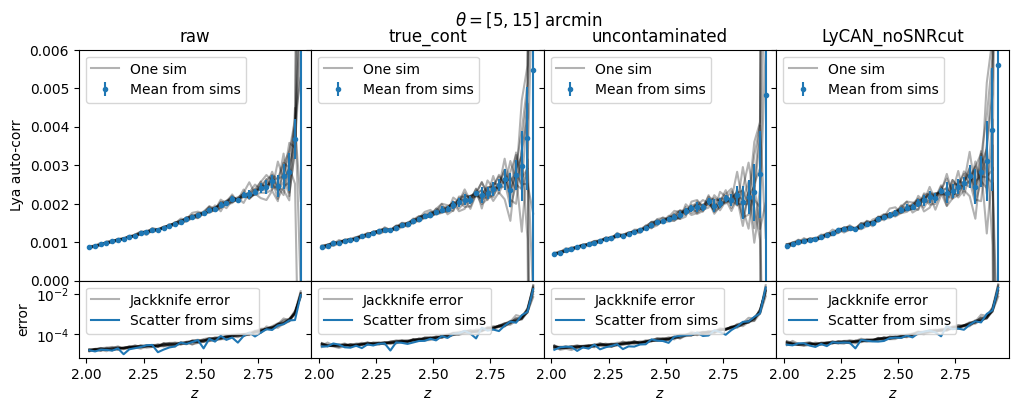

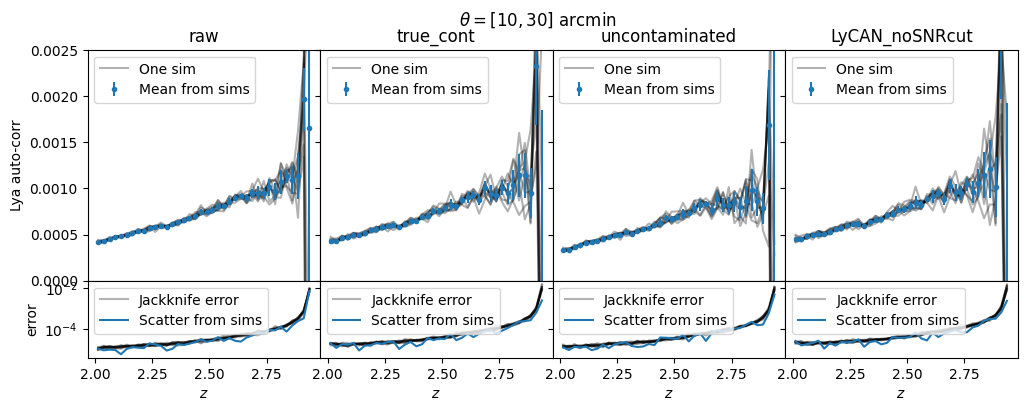

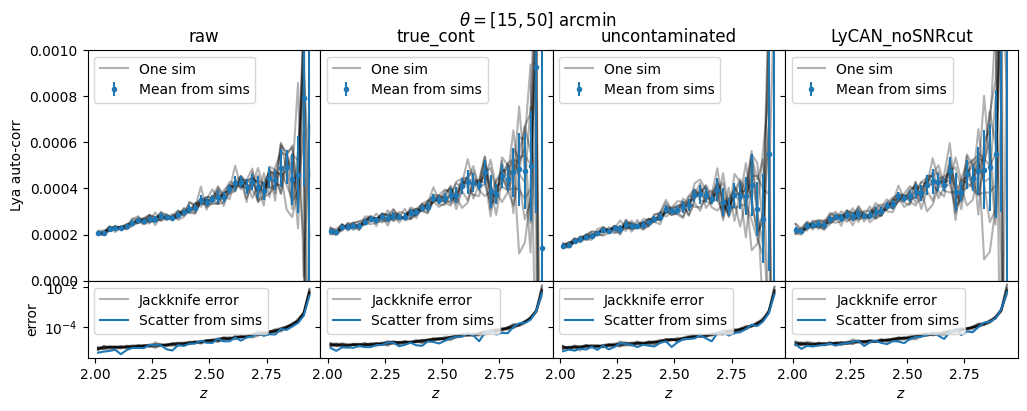

In [6]:
# now make the plots:
ylim=[
    [0,0.006],
    [0,0.0025],
    [0,0.001],
]

for jj in range(len(theta_min)):

    fig,axarr=pl.subplots(2,4,figsize=[12,4],sharey='row', gridspec_kw={'height_ratios': [3,1]},
                         sharex=True)
    
    pl.suptitle(f"$\\theta = [{theta_min[jj]}, {theta_max[jj]}]$ arcmin")
    
    for mm, mode in enumerate(['raw','true_cont','uncontaminated','LyCAN_noSNRcut']):
        for ii in range(Nsims):
            if ii == 0:
                label1="One sim"
                label2="Jackknife error"
            else:
                label1=""
                label2=""
    
            pl.sca(axarr[0, mm])
            pl.plot(z, w_ss[mode][jj][:,ii],color='k',alpha=0.3,label=label1) 
            pl.sca(axarr[1,mm]) 
            pl.plot(z, w_ss_jn[mode][jj][:,ii],color='k',alpha=0.3,label=label2) 
            
        pl.sca(axarr[0, mm])
        pl.errorbar(z, w_ss_mean[mode][jj][:,0], yerr=w_ss_mean[mode][jj][:,1], fmt='.', label="Mean from sims")
        pl.title(mode)
        pl.legend()
        
        pl.sca(axarr[1, mm])
        pl.plot(z, w_ss_mean[mode][jj][:,1], label="Scatter from sims")
        pl.xlabel("$z$")
        pl.legend()
        pl.yscale('log')
    
    pl.sca(axarr[0,0])
    pl.ylabel("Lya auto-corr")
    pl.ylim(ylim[jj])
    
    pl.sca(axarr[1,0])
    pl.ylabel("error")
    
    pl.subplots_adjust(wspace=0, hspace=0)
    
    #pl.savefig("../plots/auto-corr.pdf",bbox_inches="tight")

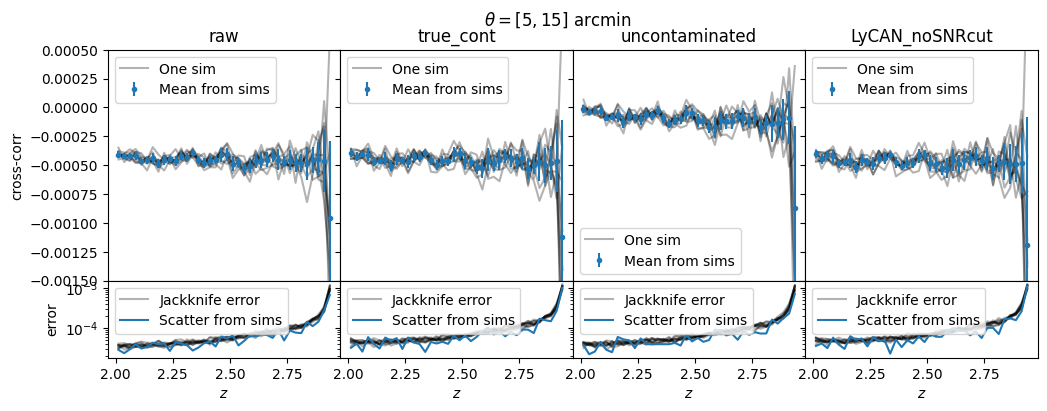

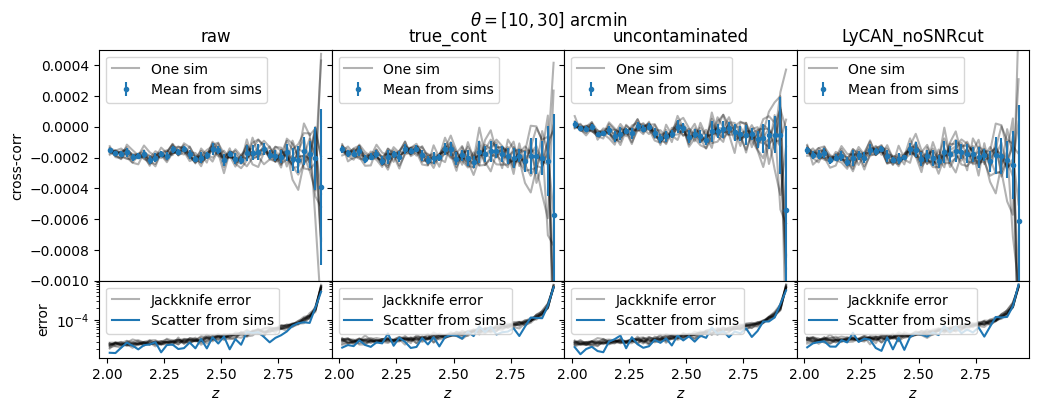

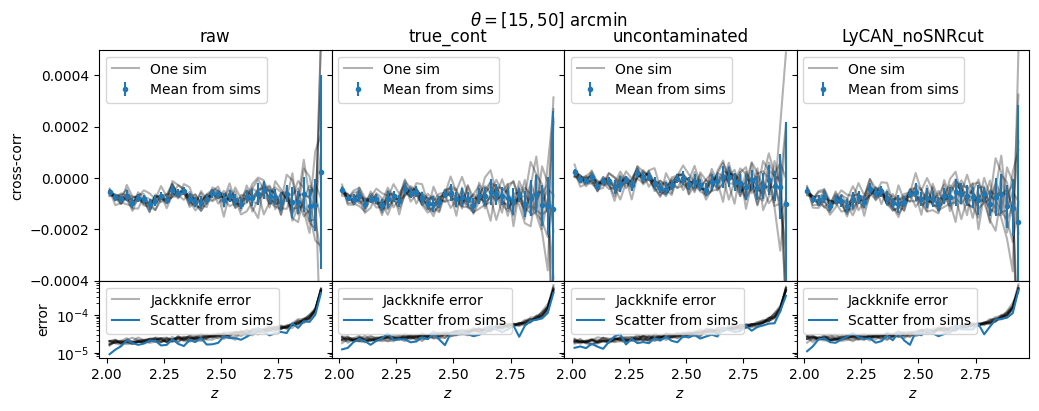

In [8]:
ylim=[
    [-0.0015,0.0005],
    [-0.0010,0.0005],
    [-0.0004,0.0005],
]
for jj in range(len(theta_min)):

    fig,axarr=pl.subplots(2,4,figsize=[12,4],sharey='row', gridspec_kw={'height_ratios': [3,1]},
                         sharex=True)
    
    pl.suptitle(f"$\\theta = [{theta_min[jj]}, {theta_max[jj]}]$ arcmin")
    
    for mm, mode in enumerate(['raw','true_cont','uncontaminated','LyCAN_noSNRcut']):
        for ii in range(Nsims):
            if ii == 0:
                label1="One sim"
                label2="Jackknife error"
            else:
                label1=""
                label2=""
    
            pl.sca(axarr[0, mm])
            pl.plot(z, w_sp[mode][jj][:,ii],color='k',alpha=0.3,label=label1) 
            pl.sca(axarr[1,mm]) 
            pl.plot(z, w_sp_jn[mode][jj][:,ii],color='k',alpha=0.3,label=label2) 
            
        pl.sca(axarr[0, mm])
        pl.errorbar(z, w_sp_mean[mode][jj][:,0], yerr=w_sp_mean[mode][jj][:,1], fmt='.', label="Mean from sims")
        pl.title(mode)
        pl.legend()
        
        pl.sca(axarr[1, mm])
        pl.plot(z, w_sp_mean[mode][jj][:,1], label="Scatter from sims")
        pl.xlabel("$z$")
        pl.legend()
        pl.yscale('log')
    
    pl.sca(axarr[0,0])
    pl.ylabel("cross-corr")
    pl.ylim(ylim[jj])
    
    pl.sca(axarr[1,0])
    pl.ylabel("error")
    
    pl.subplots_adjust(wspace=0, hspace=0)
    
    #pl.savefig("../plots/cross-corr.pdf",bbox_inches="tight")

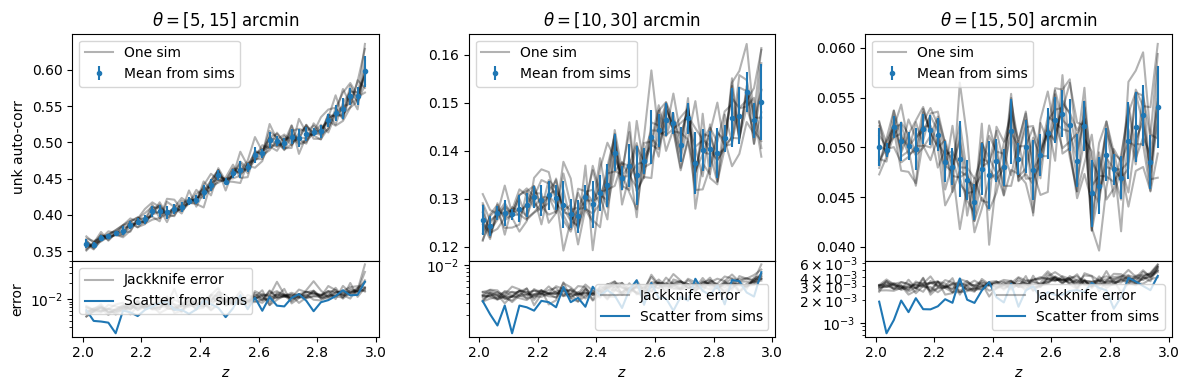

In [9]:
# auto-corr of the unk sample
fig,axarr=pl.subplots(2,3,figsize=[12,4], gridspec_kw={'height_ratios': [3,1]},
                     sharex=True)
   
for jj in range(len(theta_min)):
    
    for ii in range(Nsims):
        if ii == 0:
            label1="One sim"
            label2="Jackknife error"
        else:
            label1=""
            label2=""

        pl.sca(axarr[0, jj])
        pl.plot(z[:-1], w_pp[jj][:-1,ii],color='k',alpha=0.3,label=label1) 
        pl.sca(axarr[1,jj]) 
        pl.plot(z[:-1], w_pp_jn[jj][:-1,ii],color='k',alpha=0.3,label=label2) 
            
    pl.sca(axarr[0, jj])
    pl.errorbar(z[:-1], w_pp_mean[jj][:-1,0], yerr=w_pp_mean[jj][:-1,1], fmt='.', label="Mean from sims")
    pl.title(f"$\\theta = [{theta_min[jj]}, {theta_max[jj]}]$ arcmin")
    pl.legend()
    
    pl.sca(axarr[1, jj])
    pl.plot(z[:-1], w_pp_mean[jj][:-1,1], label="Scatter from sims")
    pl.xlabel("$z$")
    pl.legend()
    pl.yscale('log')

pl.sca(axarr[0,0])
pl.ylabel("unk auto-corr")
#pl.ylim([-0.0015,0.0003])

pl.sca(axarr[1,0])
pl.ylabel("error")

pl.tight_layout()
pl.subplots_adjust(hspace=0)

In [12]:
# load true redshifts:
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-z1.8-3.0-all-boxes.txt"
nz_sims = np.loadtxt(fname)

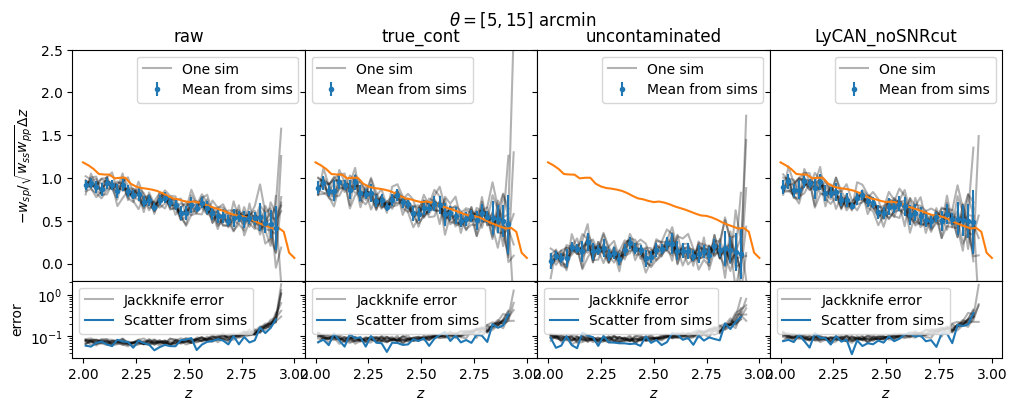

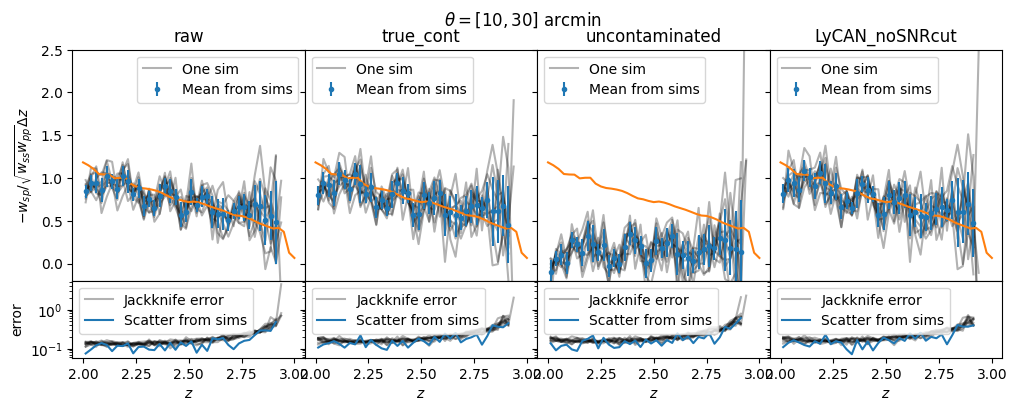

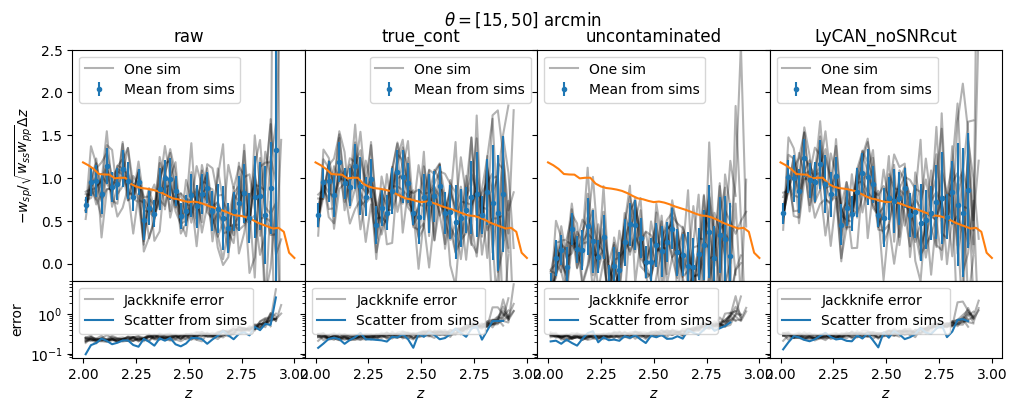

In [21]:
for jj in range(len(theta_min)):

    fig,axarr=pl.subplots(2,4,figsize=[12,4],sharey='row', gridspec_kw={'height_ratios': [3,1]},
                         sharex=True)
    
    pl.suptitle(f"$\\theta = [{theta_min[jj]}, {theta_max[jj]}]$ arcmin")
    

    for mm, mode in enumerate(['raw','true_cont','uncontaminated','LyCAN_noSNRcut']):
        for ii in range(Nsims):
            if ii == 0:
                label1="One sim"
                label2="Jackknife error"
            else:
                label1=""
                label2=""
    
            pl.sca(axarr[0, mm])
            pl.plot(z, ncc[mode][jj][:,ii],color='k',alpha=0.3,label=label1) 
            pl.sca(axarr[1,mm]) 
            pl.plot(z, ncc_jn[mode][jj][:,ii],color='k',alpha=0.3,label=label2) 
            
        pl.sca(axarr[0, mm])
        pl.errorbar(z, ncc_mean[mode][jj][:,0], yerr=ncc_mean[mode][jj][:,1], 
                    fmt='.', label="Mean from sims")
        pl.title(mode)
        pl.legend()
        
        pl.sca(axarr[1, mm])
        pl.plot(z, ncc_mean[mode][jj][:,1], label="Scatter from sims")
        pl.xlabel("$z$")
        pl.legend()
        pl.yscale('log')

        pl.sca(axarr[0, mm])
        pl.plot(nz_sims[:,0], nz_sims[:,1])
    
    pl.sca(axarr[0,0])
    pl.ylabel("$-w_{sp} / \\sqrt{w_{ss} w_{pp}} \\Delta z$")
    pl.ylim([-0.2, 2.5])
    
    pl.sca(axarr[1,0])
    pl.ylabel("error")
    
    pl.subplots_adjust(wspace=0, hspace=0)
    #pl.savefig("../plots/ncc.pdf",bbox_inches="tight")

### produce a plot to compare the results from true_cont and LyCAN noSNRcut

In [175]:
fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-true-z1.8-3.0-all-boxes-40bin.txt"
fin = np.loadtxt(fname)
nz_norm = fin[:-1,1]
nz_edges = fin[:,0]

Text(0.5, 1.0, 'Avg. and std. of 10 mocks')

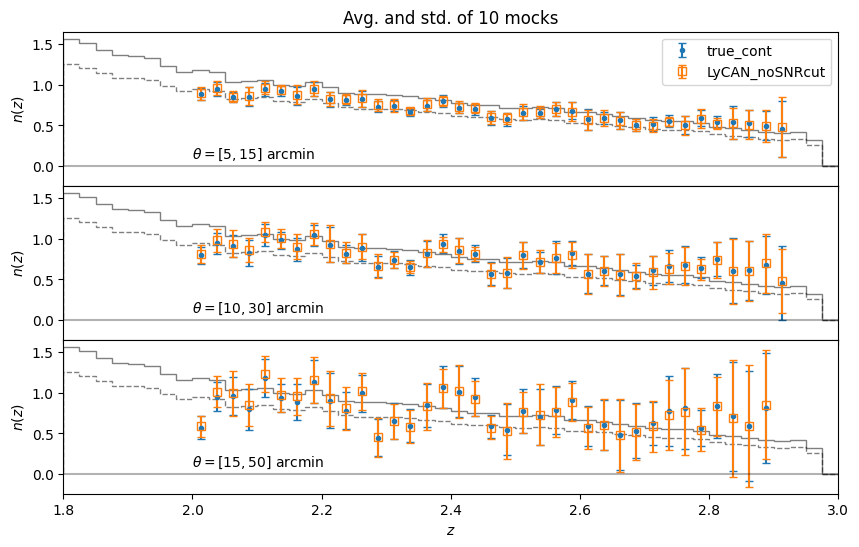

In [181]:
fig,axarr=pl.subplots(3, figsize=[10,6],sharey=True,sharex=True)

for jj in range(len(theta_min)):
    pl.sca(axarr[jj])
    pl.errorbar(z, ncc_mean["true_cont"][jj][:,0], yerr=ncc_mean["true_cont"][jj][:,1], 
                    fmt='.',capsize=3, label="true_cont")
    pl.errorbar(z, ncc_mean["LyCAN_noSNRcut"][jj][:,0], yerr=ncc_mean["LyCAN_noSNRcut"][jj][:,1], 
                    fmt='s', fillstyle='none', capsize=3, label="LyCAN_noSNRcut")
    pl.text(2, 0.1, f"$\\theta = [{theta_min[jj]}, {theta_max[jj]}]$ arcmin")
    
    pl.ylabel("$n(z)$")

    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.5)
    pl.stairs(nz_norm*0.8,nz_edges, color='k', alpha=0.5, ls='--')
    pl.plot([1.7,3],[0,0],'k-', alpha=0.3)
    
pl.subplots_adjust(hspace=0)
pl.xlabel("$z$")
pl.xlim([1.8,3.0])

pl.sca(axarr[0])
pl.legend()
pl.title("Avg. and std. of 10 mocks")

# Appenfix 1: True redshifts of the 10 phot sims

In [57]:
Nsims = 10
# interp to between z=[2,3] and with 40 bins
zsamp_target = np.linspace(2,3,41)

$1.8<z<3.0$ full

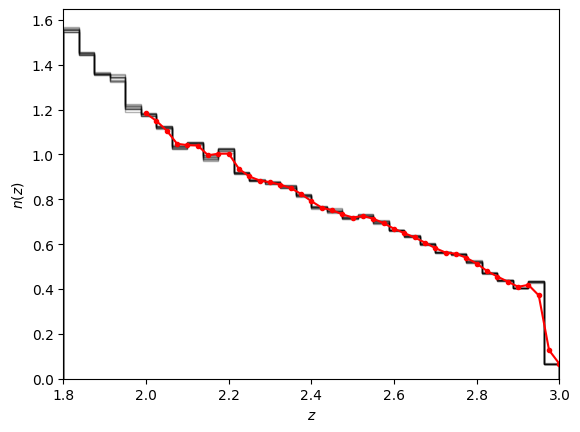

In [58]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
nz_mean = 0
for ii in range(Nsims):
    nz_true = np.loadtxt(root + f"run-{ii}/catalogue/nz-unknown-zmin-1.8-zmax-3.0.txt")
    zz = nz_true[:,0]
    dz = zz[1]-zz[0]
    nz_norm = nz_true[:,1]/np.sum(nz_true[:,1])/dz
    nz_edges = np.append(zz-dz/2., zz[-1] + dz/2.)
    #pl.plot(nz_true[ind,0], nz_true[ind,1], color='k', alpha=0.3)
    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.3)
    nz_mean += nz_norm/Nsims

pl.xlim([1.8,3.0])
pl.xlabel("$z$")
pl.ylabel("$n(z)$")

# compute mean and save
# normalize:
nz_mean = nz_mean/sum(nz_mean)/dz

nz_mean_interp = np.interp(zsamp_target, zz, nz_mean)
pl.plot(zsamp_target, nz_mean_interp, '.-', color='r')

fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-z1.8-3.0-all-boxes.txt"
np.savetxt(fname, np.c_[zsamp_target, nz_mean_interp])

$1.8<z<3.0$ low (currently only has box-0)

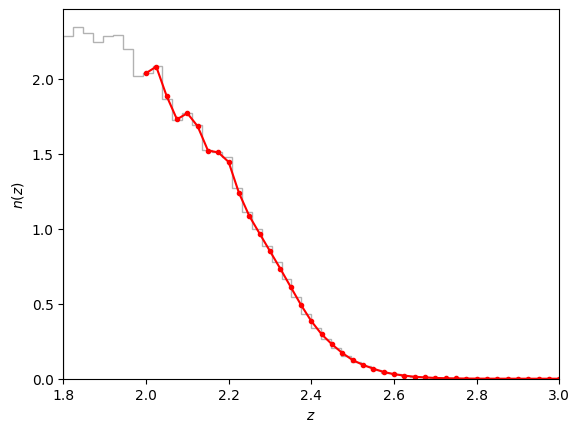

In [14]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
nz_mean = 0
for ii in range(1):
    nz_true = np.loadtxt(root + f"run-{ii}/catalogue/nz-unknown-low-zmin-1.8-zmax-3.0.txt")
    zz = nz_true[:,0]
    dz = zz[1]-zz[0]
    nz_norm = nz_true[:,1]/np.sum(nz_true[:,1])/dz
    nz_edges = np.append(zz-dz/2., zz[-1] + dz/2.)
    #pl.plot(nz_true[ind,0], nz_true[ind,1], color='k', alpha=0.3)
    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.3)
    nz_mean += nz_norm/Nsims

pl.xlim([1.8,3.0])
pl.xlabel("$z$")
pl.ylabel("$n(z)$")

# compute mean and save
# normalize:
nz_mean = nz_mean/sum(nz_mean)/dz

nz_mean_interp = np.interp(zsamp_target, zz, nz_mean)
pl.plot(zsamp_target, nz_mean_interp, '.-', color='r')

fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-low-z1.8-3.0-box-0.txt"
np.savetxt(fname, np.c_[zsamp_target, nz_mean_interp])

$1.8<z<3.0$ mid (currently only has box-0)

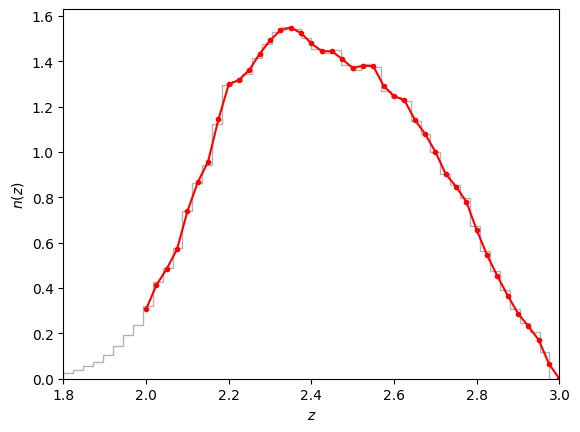

In [15]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
nz_mean = 0
for ii in range(1):
    nz_true = np.loadtxt(root + f"run-{ii}/catalogue/nz-unknown-mid-zmin-1.8-zmax-3.0.txt")
    zz = nz_true[:,0]
    dz = zz[1]-zz[0]
    nz_norm = nz_true[:,1]/np.sum(nz_true[:,1])/dz
    nz_edges = np.append(zz-dz/2., zz[-1] + dz/2.)
    #pl.plot(nz_true[ind,0], nz_true[ind,1], color='k', alpha=0.3)
    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.3)
    nz_mean += nz_norm/Nsims

pl.xlim([1.8,3.0])
pl.xlabel("$z$")
pl.ylabel("$n(z)$")

# compute mean and save
# normalize:
nz_mean = nz_mean/sum(nz_mean)/dz

nz_mean_interp = np.interp(zsamp_target, zz, nz_mean)
pl.plot(zsamp_target, nz_mean_interp, '.-', color='r')

fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-mid-z1.8-3.0-box-0.txt"
np.savetxt(fname, np.c_[zsamp_target, nz_mean_interp])

$0.0<z<3.0$ srd (currently only has box-0)

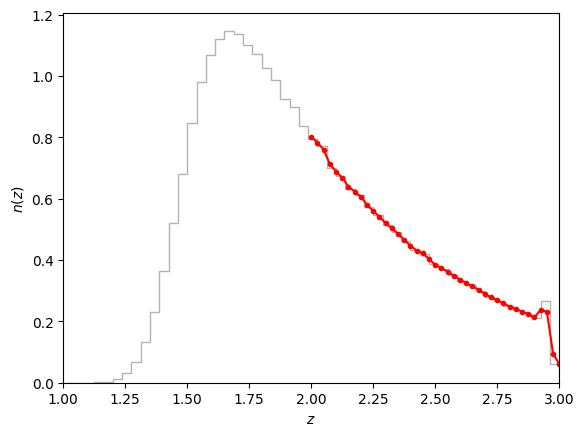

In [19]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"
nz_mean = 0
for ii in range(1):
    nz_true = np.loadtxt(root + f"run-{ii}/catalogue/nz-unknown-SRD_nz-zmin-0-zmax-3.txt")
    zz = nz_true[:,0]
    dz = zz[1]-zz[0]
    nz_norm = nz_true[:,1]/np.sum(nz_true[:,1])/dz
    nz_edges = np.append(zz-dz/2., zz[-1] + dz/2.)
    #pl.plot(nz_true[ind,0], nz_true[ind,1], color='k', alpha=0.3)
    pl.stairs(nz_norm,nz_edges, color='k', alpha=0.3)
    nz_mean += nz_norm/Nsims

pl.xlim([1.0,3.0])
pl.xlabel("$z$")
pl.ylabel("$n(z)$")

# compute mean and save
# normalize:
nz_mean = nz_mean/sum(nz_mean)/dz

nz_mean_interp = np.interp(zsamp_target, zz, nz_mean)
pl.plot(zsamp_target, nz_mean_interp, '.-', color='r')

fname = "/pscratch/sd/q/qhang/desi-lya/nz-gal-SRD_nz-z0-3-box-0.txt"
np.savetxt(fname, np.c_[zsamp_target, nz_mean_interp])

In [23]:
fin = fits.open("/pscratch/sd/q/qhang/desi-lya/random-catalogue-overlap-w-z.fits")
fin[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                10076 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'Z       '        

Text(0, 0.5, 'Random counts')

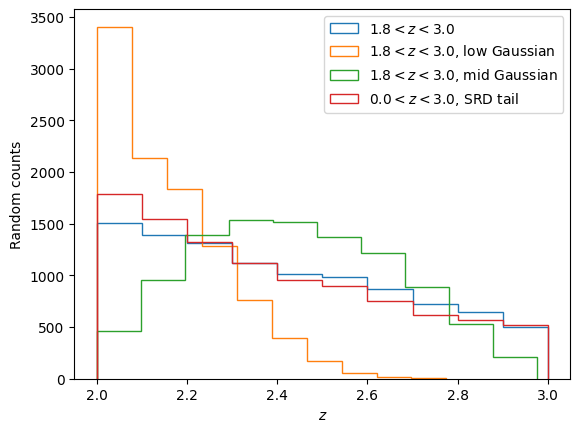

In [28]:
cc=pl.hist(fin[1].data['Z'],histtype='step',label="$1.8<z<3.0$")
cc=pl.hist(fin[1].data['Z_LOW'],histtype='step',label="$1.8<z<3.0$, low Gaussian")
cc=pl.hist(fin[1].data['Z_MID'],histtype='step',label="$1.8<z<3.0$, mid Gaussian")
cc=pl.hist(fin[1].data['Z_SRD'],histtype='step',label="$0.0<z<3.0$, SRD tail")
pl.legend()
pl.xlabel("$z$")
pl.ylabel("Random counts")